In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pd.pandas.set_option("display.max_columns",None)

In [2]:
dataset=pd.read_csv("C:\\Users\\Bharath\\Downloads\\train.csv")

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dataset.shape 

(1460, 81)

## As we can see we have 81 features which includes our dependent feature as well. let's see how many features have missing values. and its nature in the given data

In [7]:
df= dataset.copy()
# to select columns with null value using list comp
col_with_na = [ f for f in df.columns if df[f].isna().sum()>1]

# # to check how much null values are there in all the ccolumn 
for i in col_with_na :
    print(i,np.round(df[i].isnull().mean(),4),"% Missing Values")


LotFrontage 0.1774 % Missing Values
Alley 0.9377 % Missing Values
MasVnrType 0.0055 % Missing Values
MasVnrArea 0.0055 % Missing Values
BsmtQual 0.0253 % Missing Values
BsmtCond 0.0253 % Missing Values
BsmtExposure 0.026 % Missing Values
BsmtFinType1 0.0253 % Missing Values
BsmtFinType2 0.026 % Missing Values
FireplaceQu 0.4726 % Missing Values
GarageType 0.0555 % Missing Values
GarageYrBlt 0.0555 % Missing Values
GarageFinish 0.0555 % Missing Values
GarageQual 0.0555 % Missing Values
GarageCond 0.0555 % Missing Values
PoolQC 0.9952 % Missing Values
Fence 0.8075 % Missing Values
MiscFeature 0.963 % Missing Values


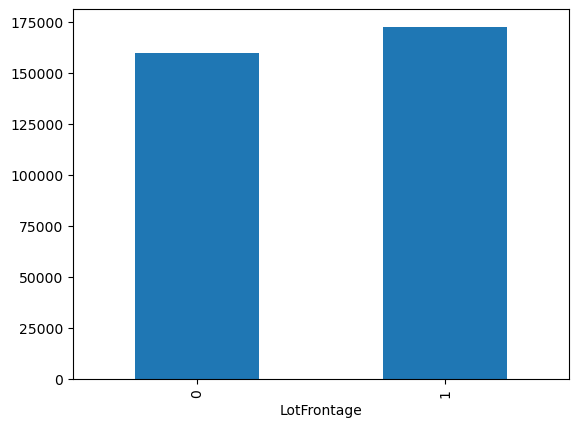

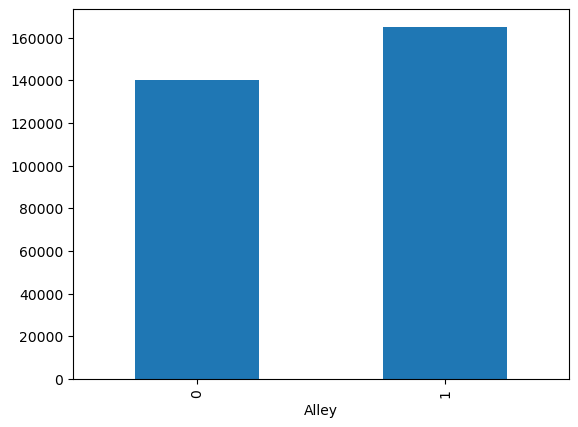

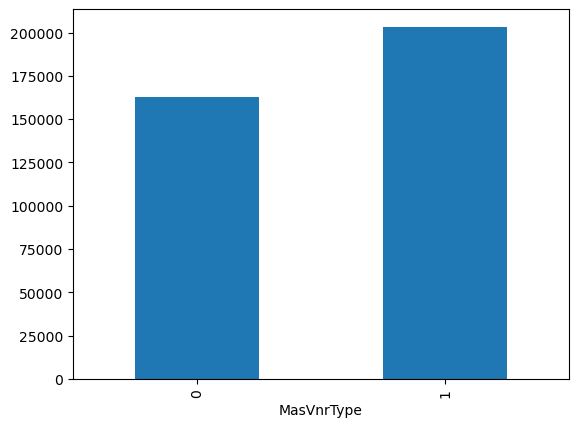

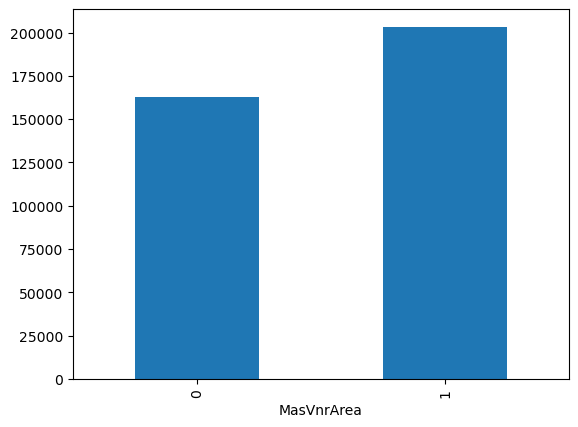

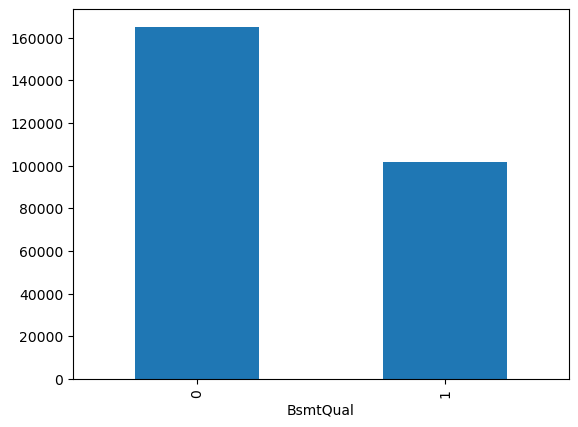

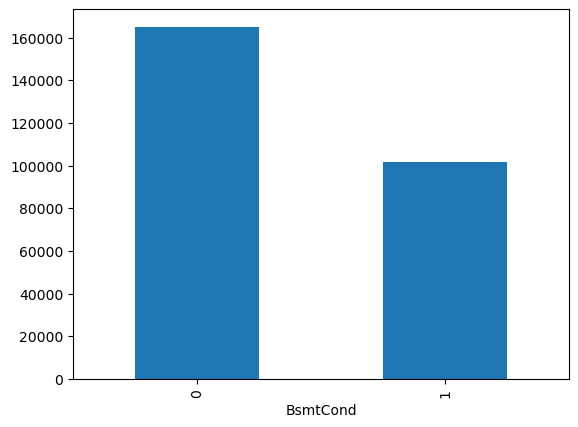

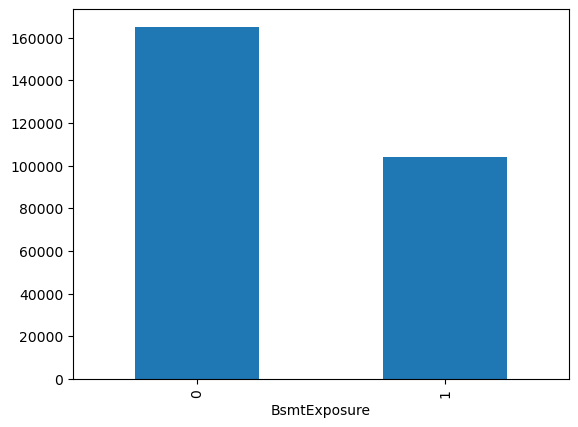

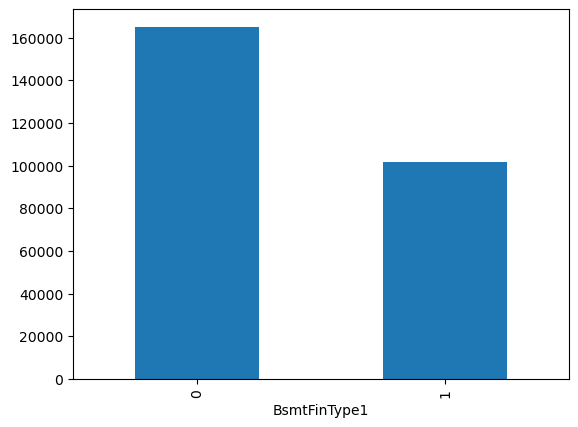

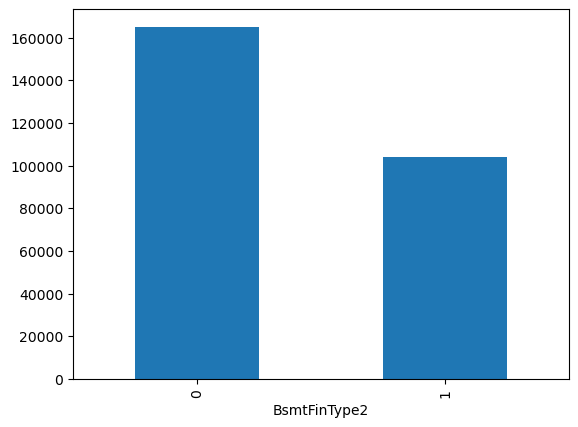

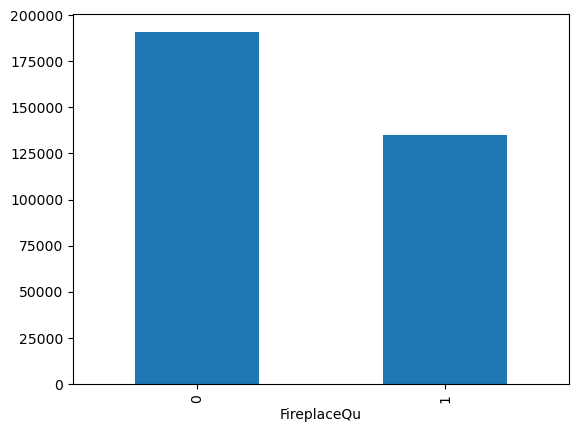

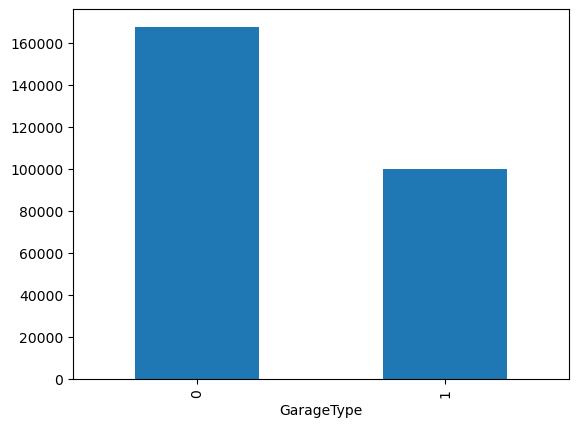

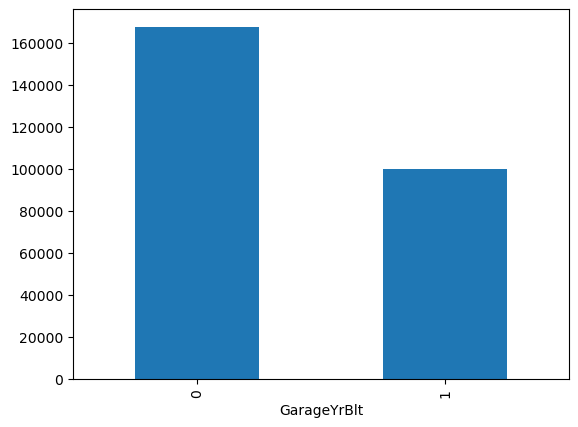

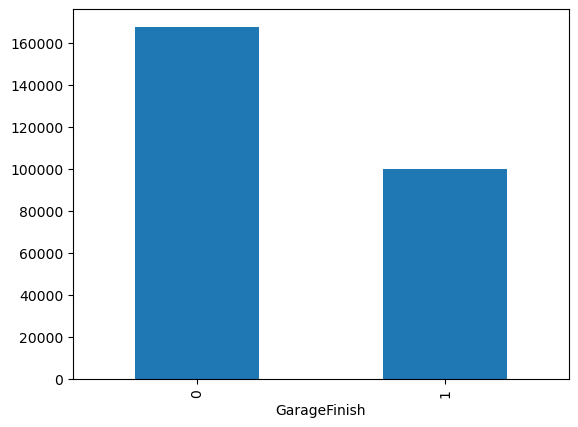

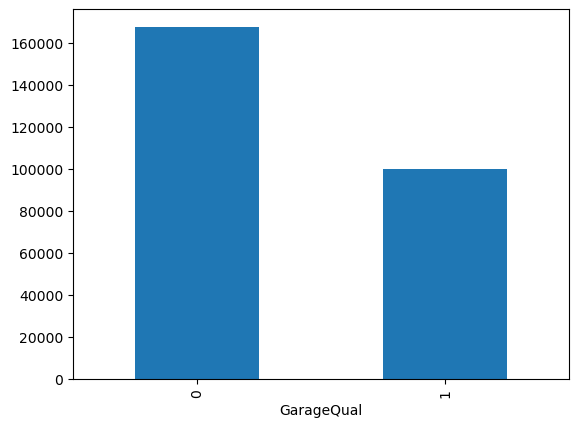

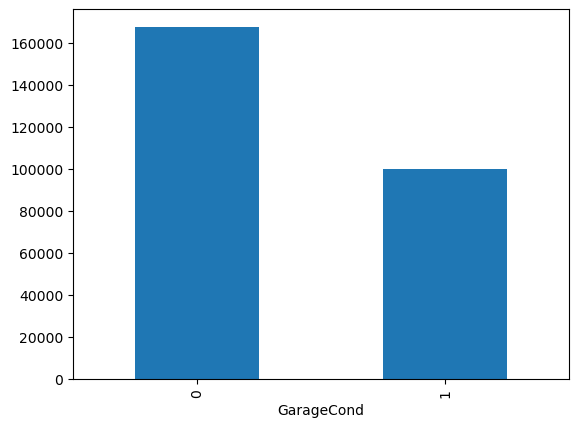

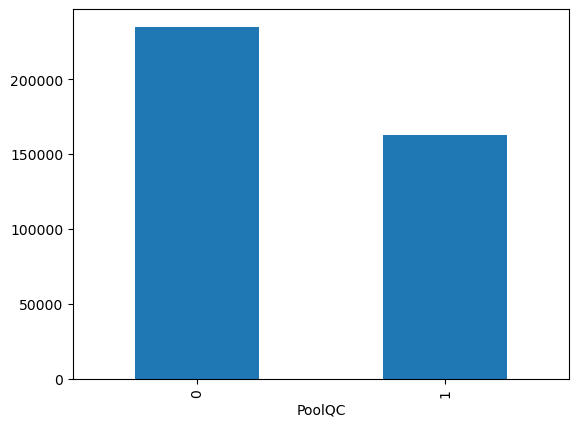

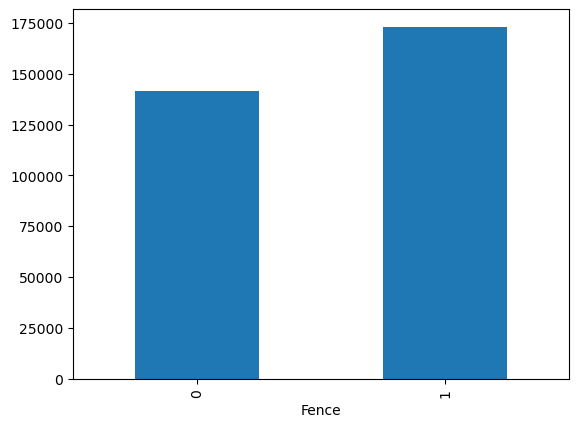

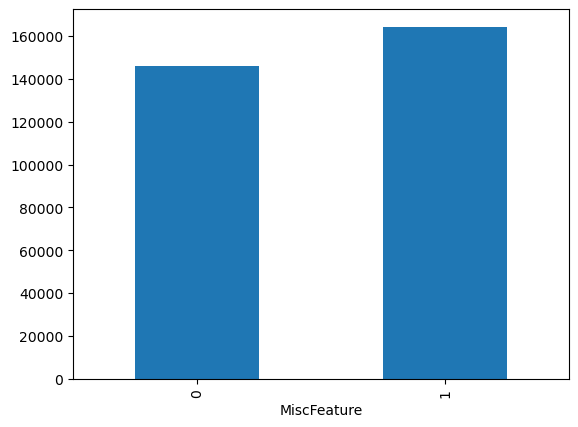

In [8]:
df_copy = df.copy()
for i in col_with_na:
        df_copy[i]=np.where(df_copy[i].isnull(),1,0)
        
        df_copy.groupby(i)['SalePrice'].median().plot.bar()
        plt.show()

* Here we can see the null values in some feature having the higher sale price so we have to impute them with something during the feature engineering 


# lets deal with the numerical values 
 
 


In [9]:
num_feature= [ i for i in df.columns if df[i].dtypes!='object']
df[num_feature].head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# since there is date time feature present lets explore those features first 

year = [ y for y in num_feature if "Yr" in y or "Year" in y ]
year 

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
for f in df[year]:
    print(f,df[f].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

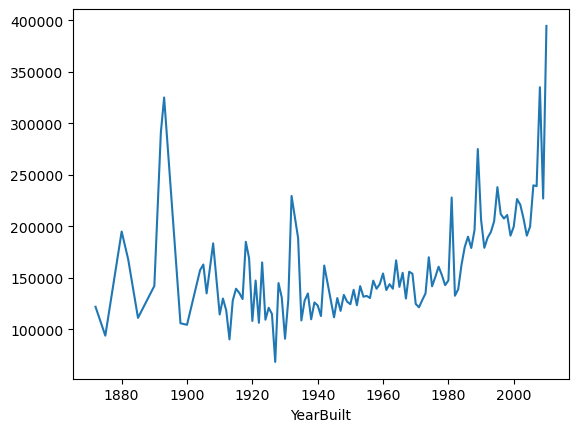

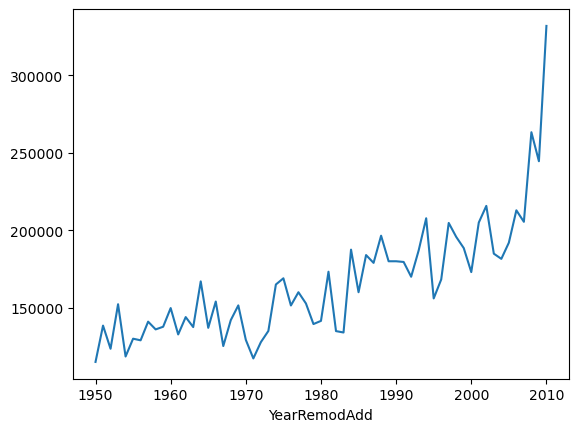

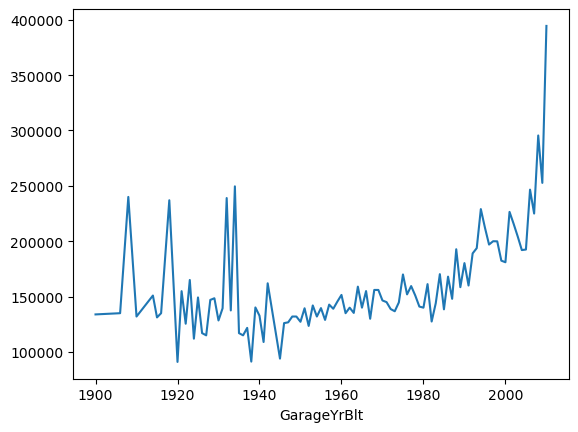

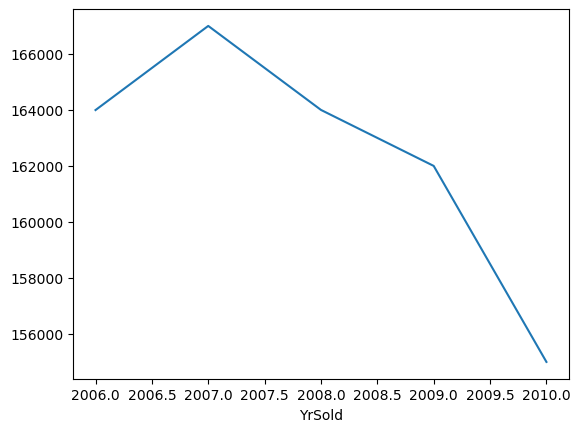

In [9]:
for i in year:
    df.groupby(i)['SalePrice'].median().plot()
    plt.show()

## We can infer that yearbuilt, yearremodadd, garageyrblt are positilvely corelated with sale price whereas year sold is negatively corelated, So we can conclude the older the property gets lesser the saleprice is 

# let's check the discrete feature and how it affect the price 


In [12]:
discrete_feature = [ x for x in num_feature if len(df[x].unique())<25 and x not in df[year]]
discrete_feature 

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [13]:
df[discrete_feature]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


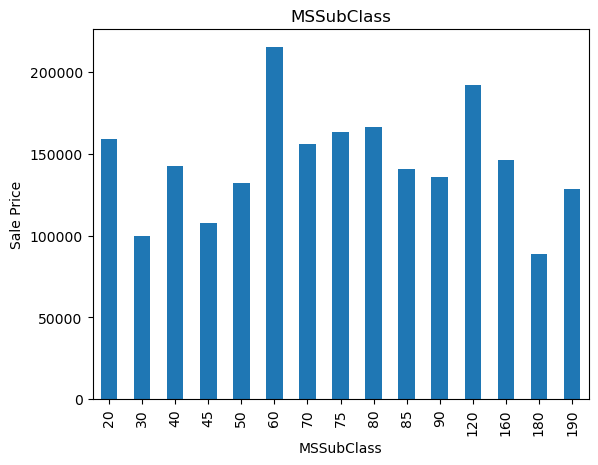

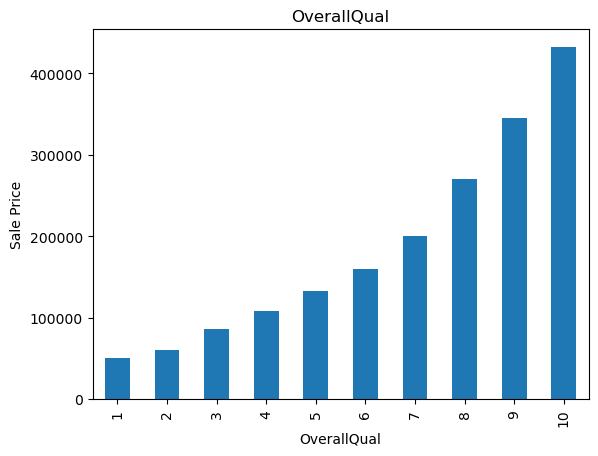

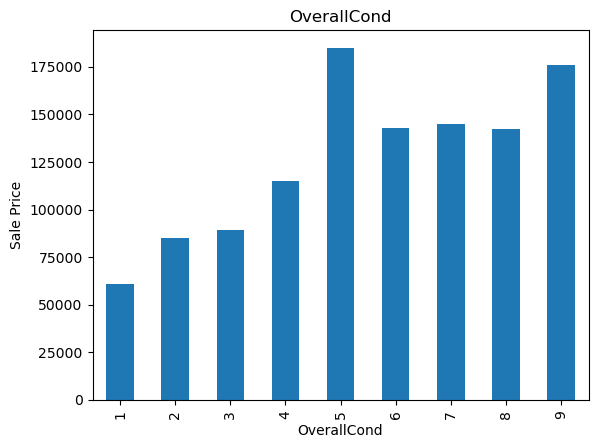

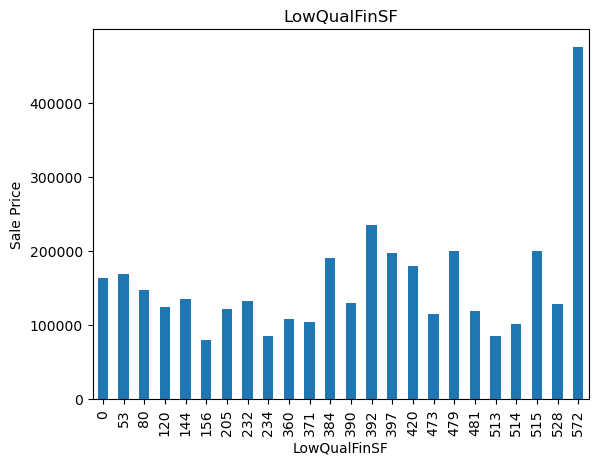

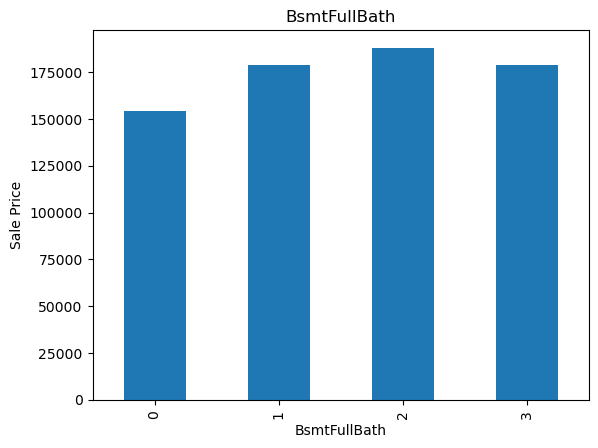

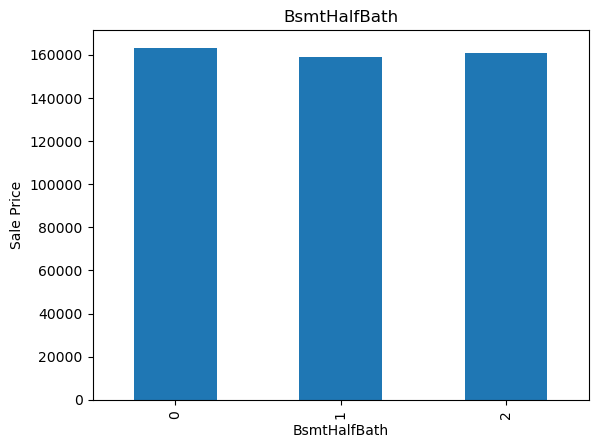

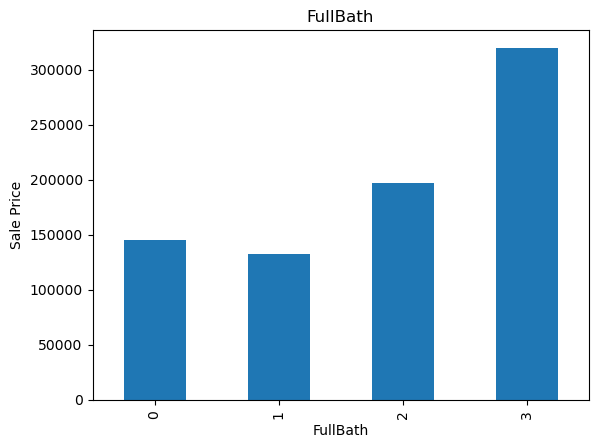

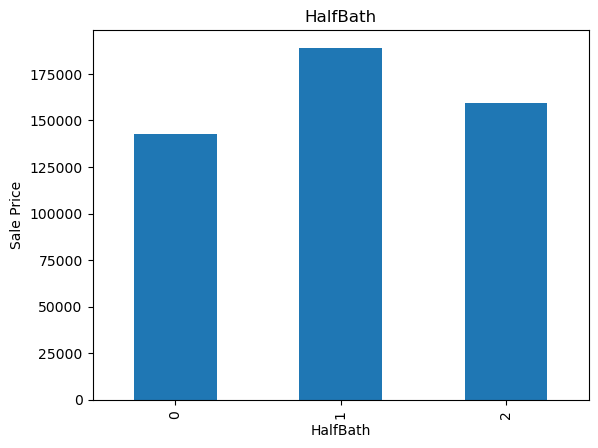

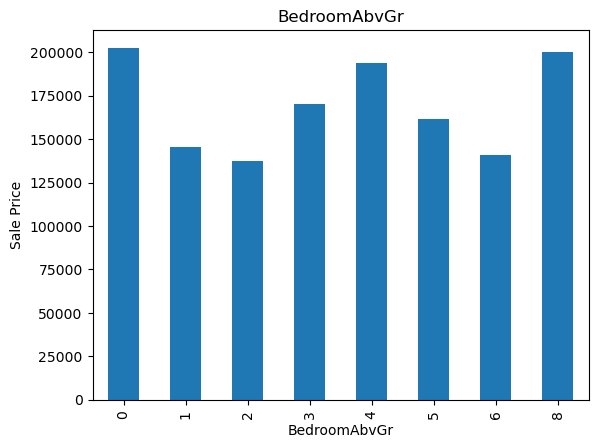

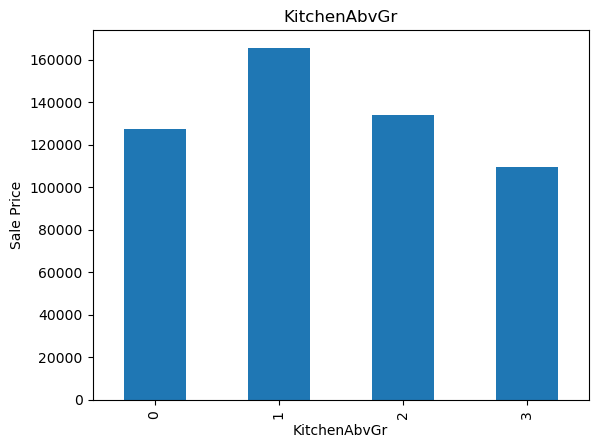

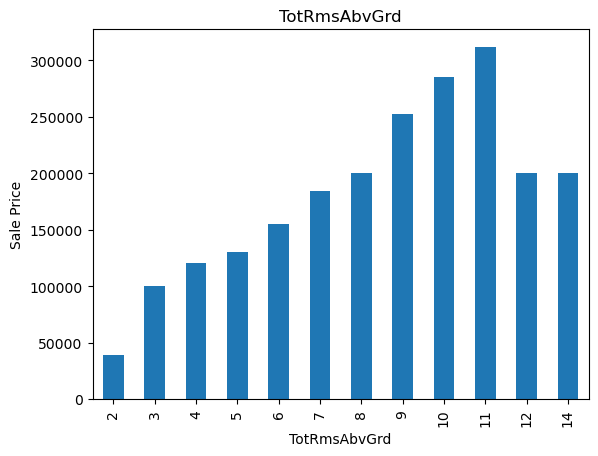

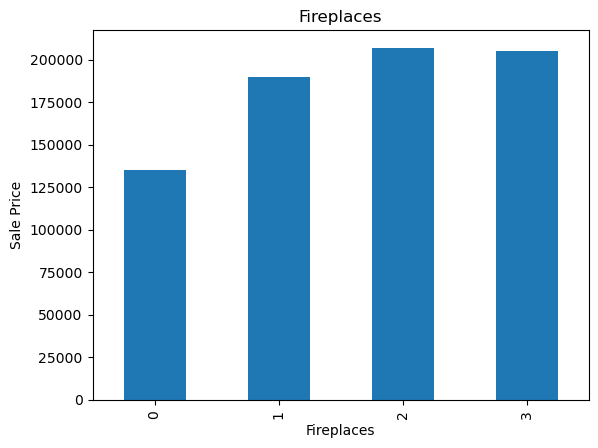

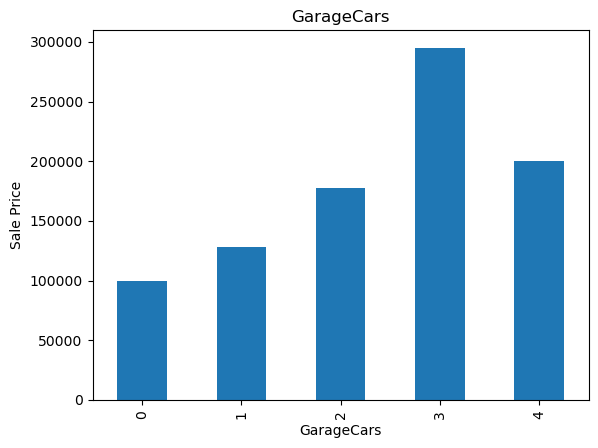

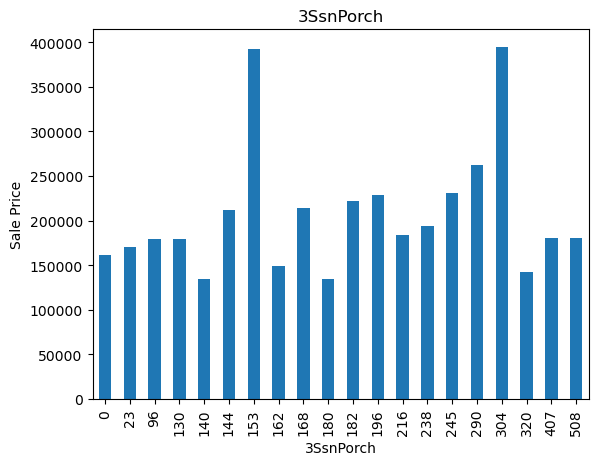

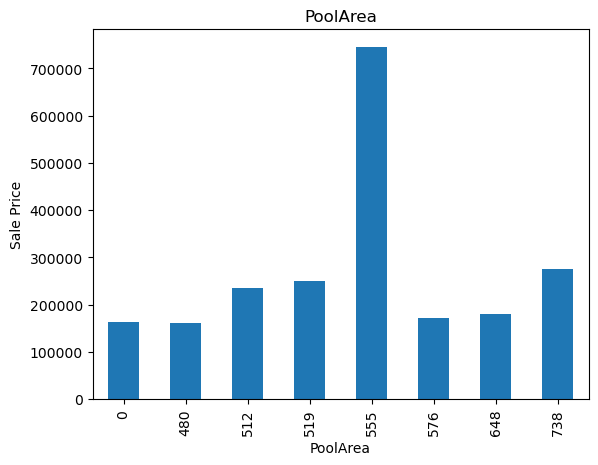

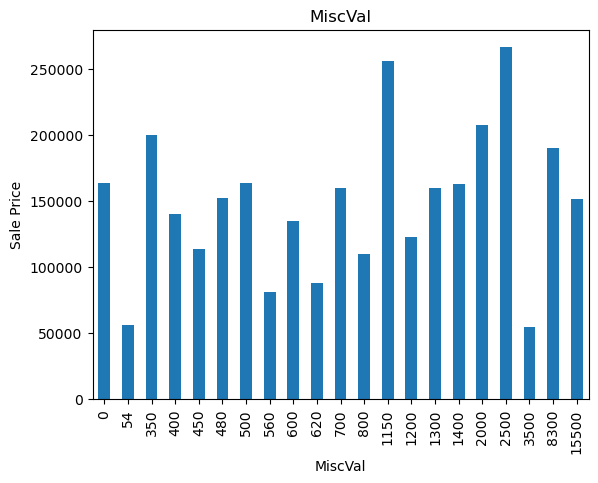

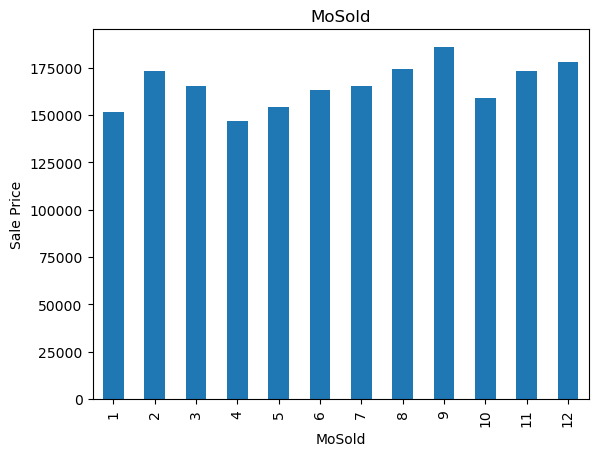

In [14]:
for i in discrete_feature:
    df1 = df.copy()
    df1.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Sale Price')
    plt.show()

## There are some discrete features where the price is increasing as their value increases. 

In [15]:
continous_feature = [ i for i in num_feature if i not in discrete_feature+  year + ['Id']]
continous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

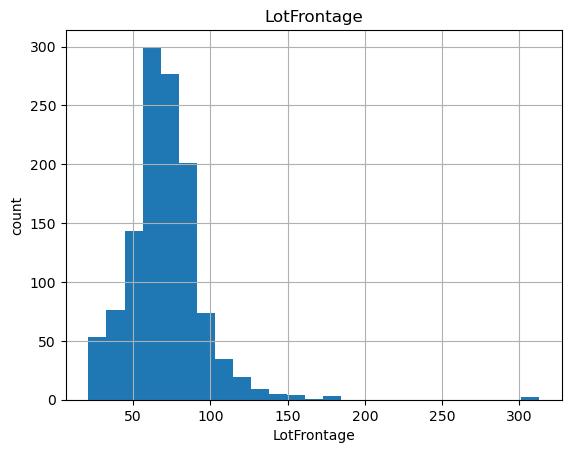

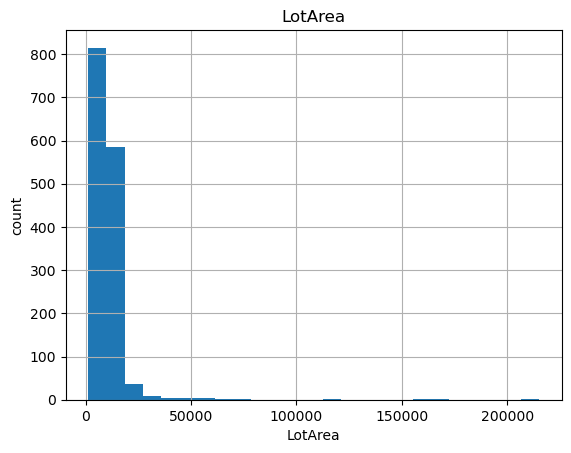

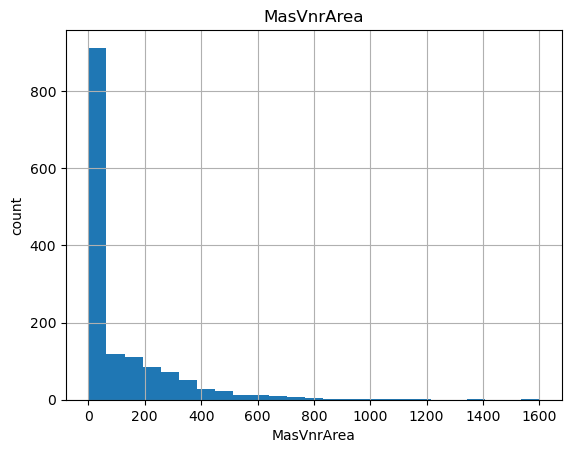

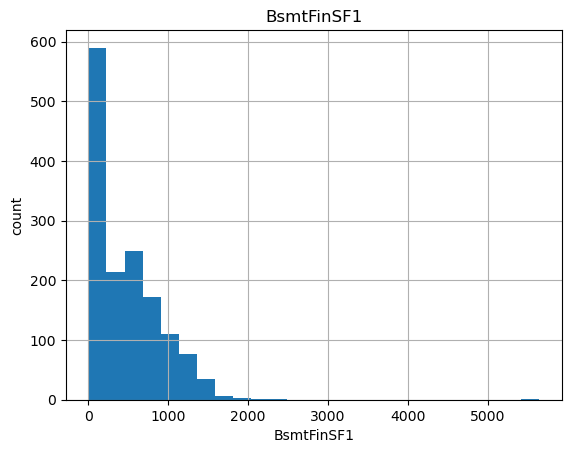

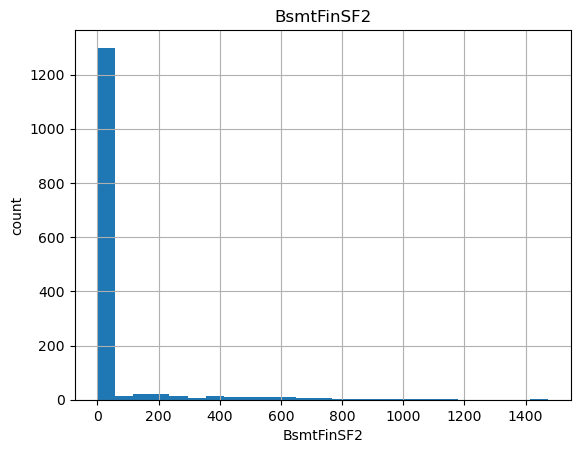

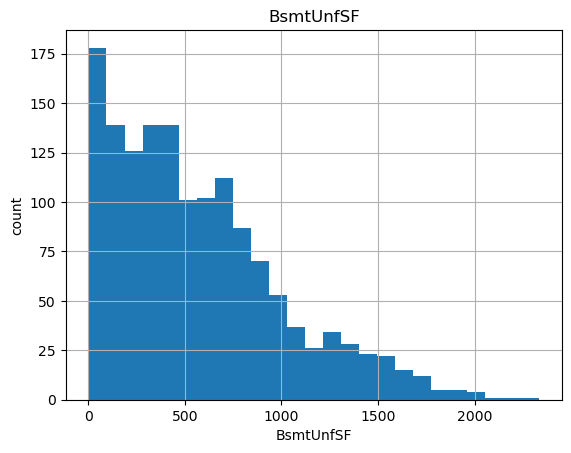

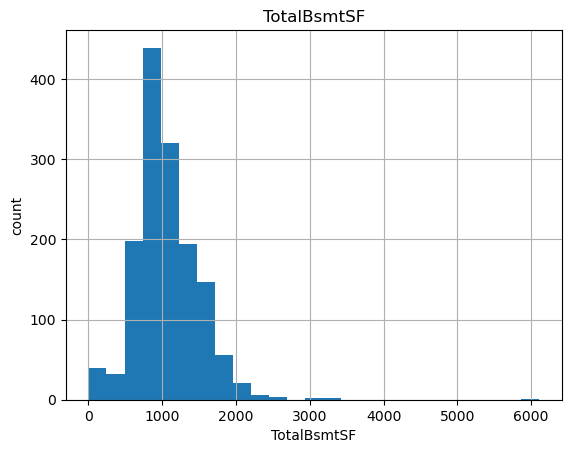

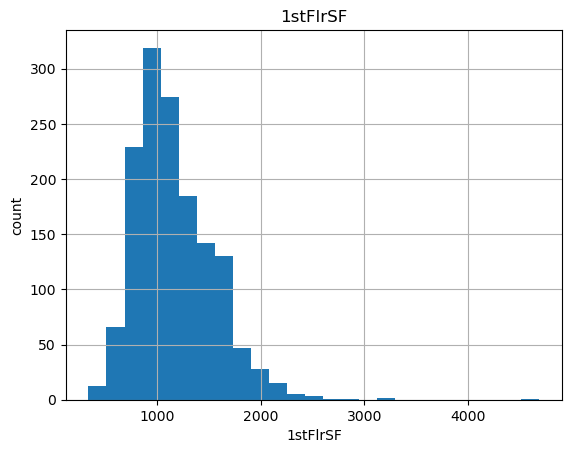

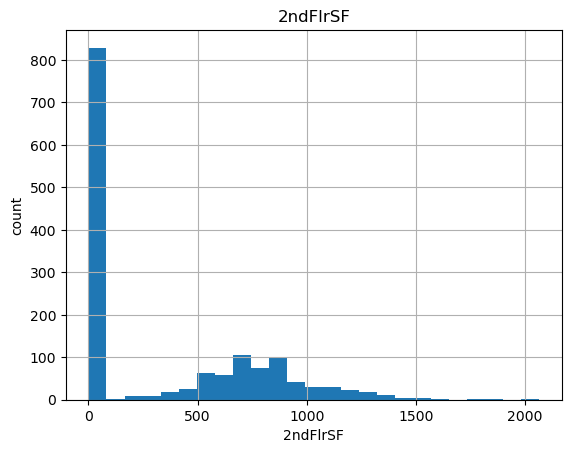

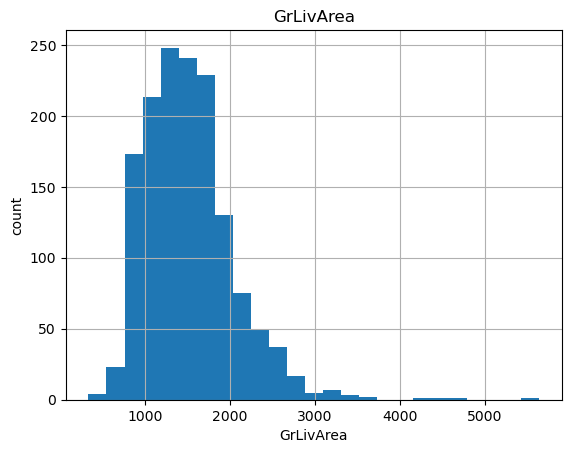

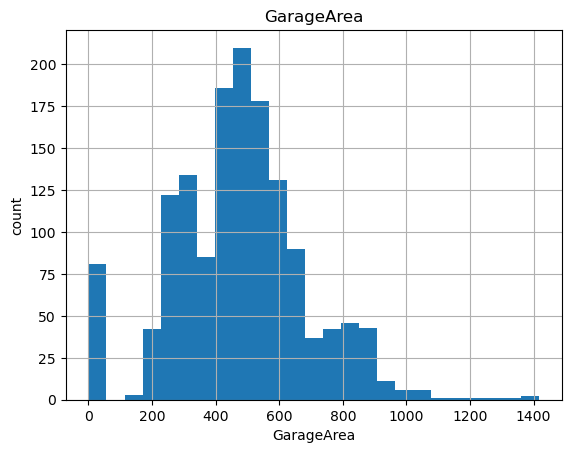

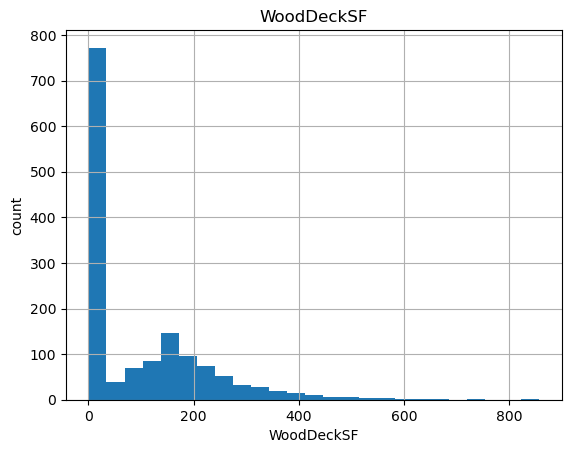

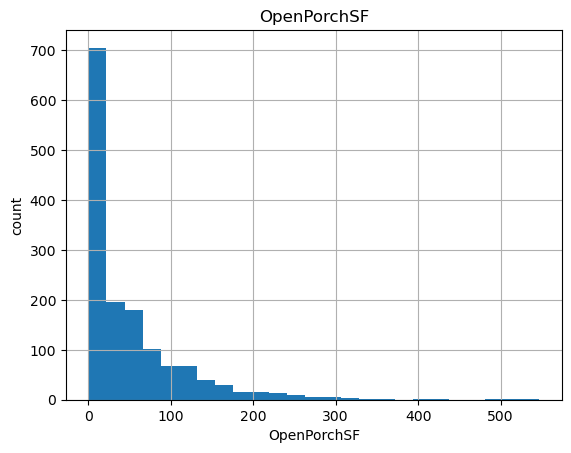

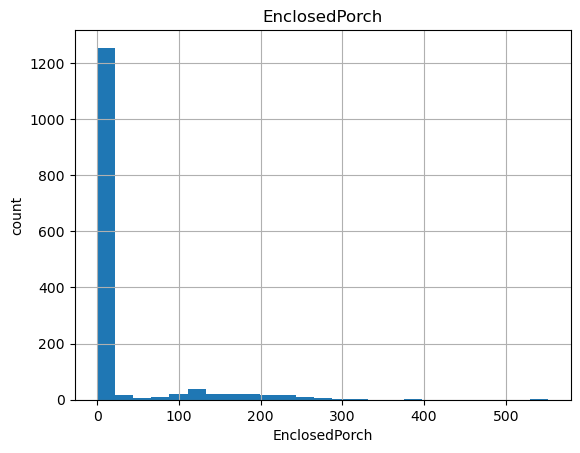

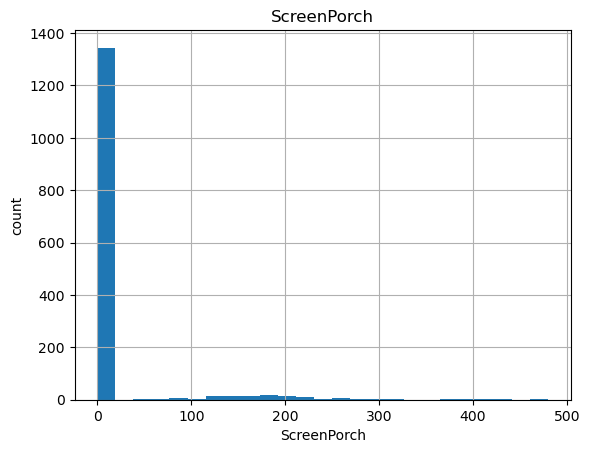

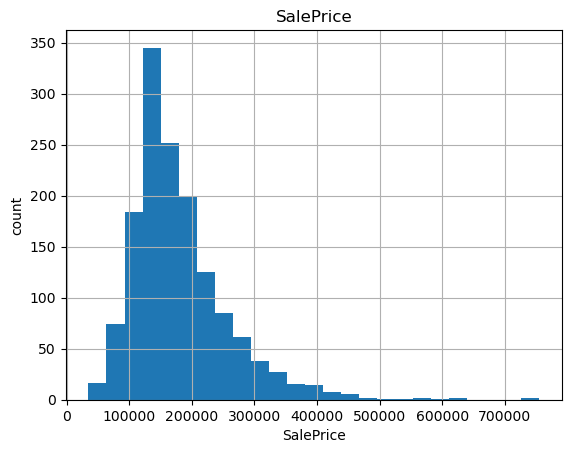

In [16]:
for i in continous_feature:
    df1=df.copy()
    df1[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(i)
    plt.show()

# Transforming the data to convert them into normal (Gaussian) distribution

In [17]:
data= df.copy()


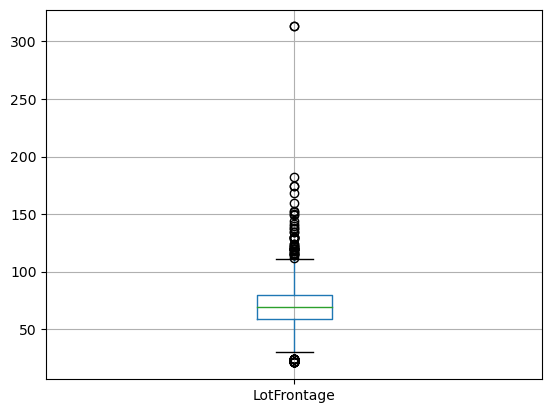

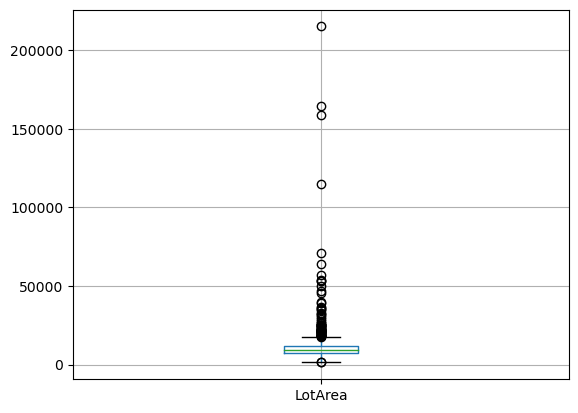

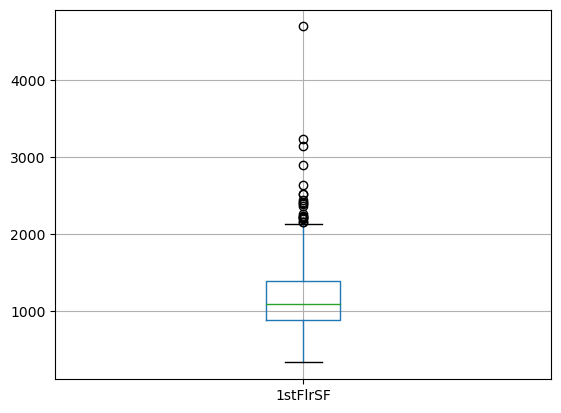

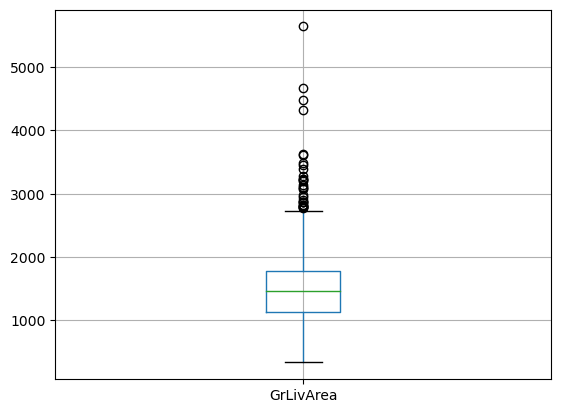

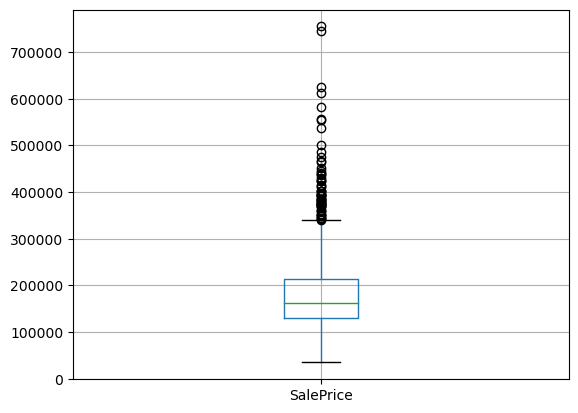

In [18]:
# outlier imputation

for feature in continous_feature:
    if 0 in data[feature].unique():
        pass
    else:
#         data[feature]= np.log(data[feature])
        data.boxplot(column = feature)
        plt.show()

# we can observe that there is outliers in all the feature we will deal with the out lier's first with IQR Method 

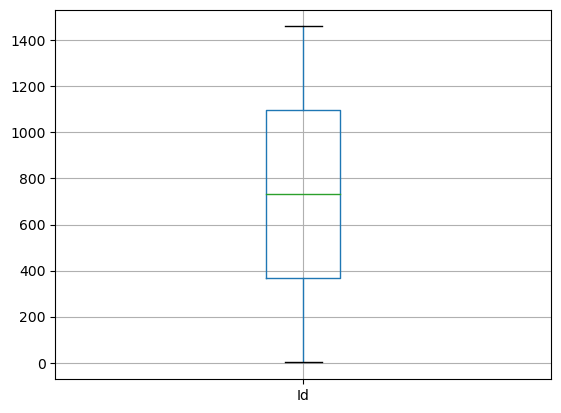

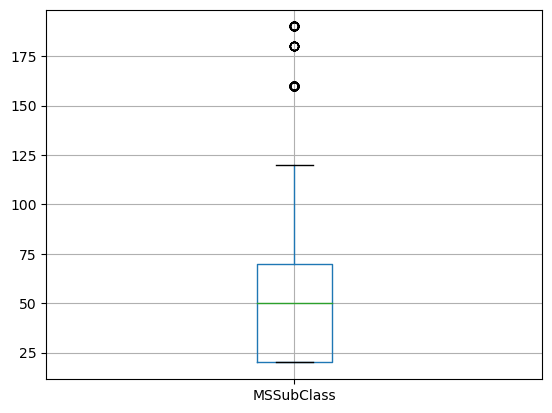

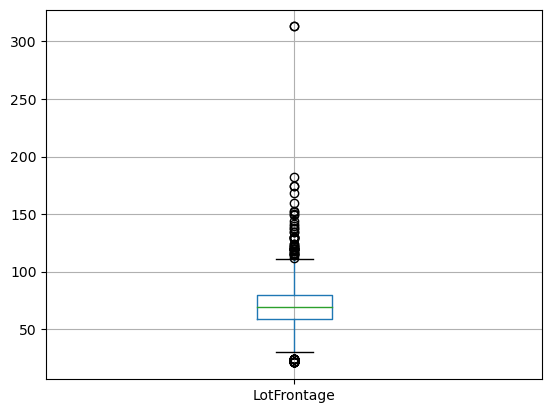

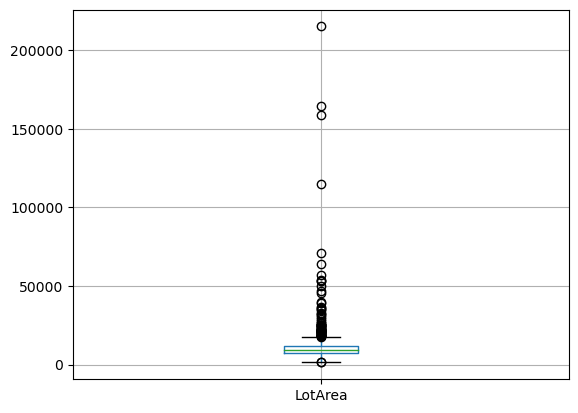

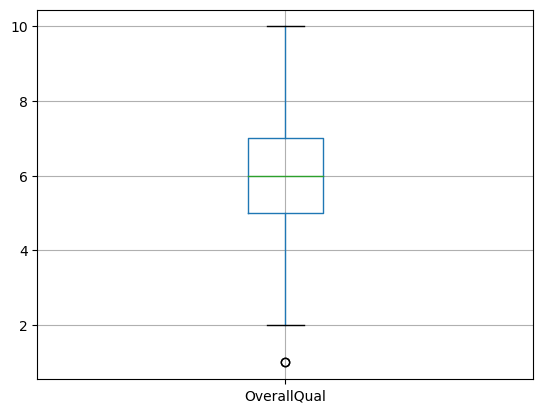

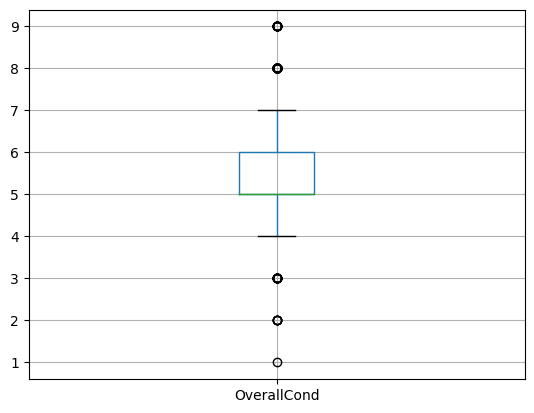

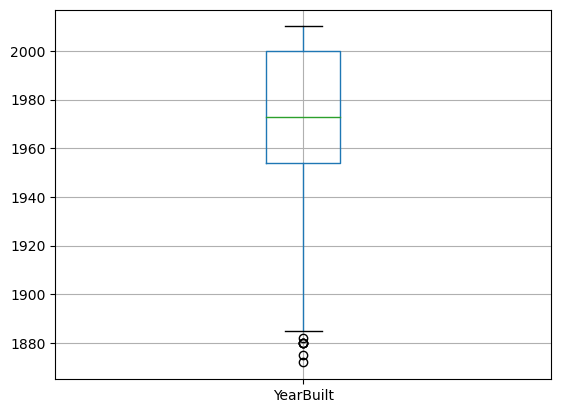

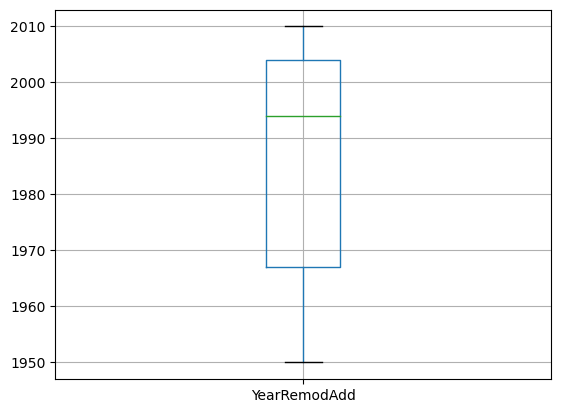

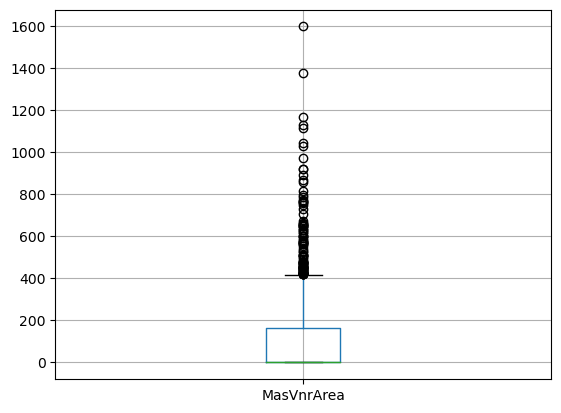

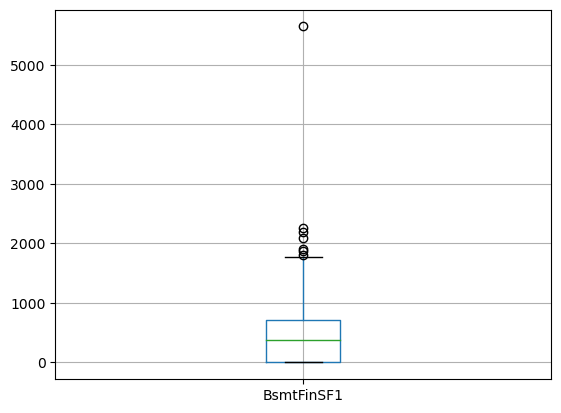

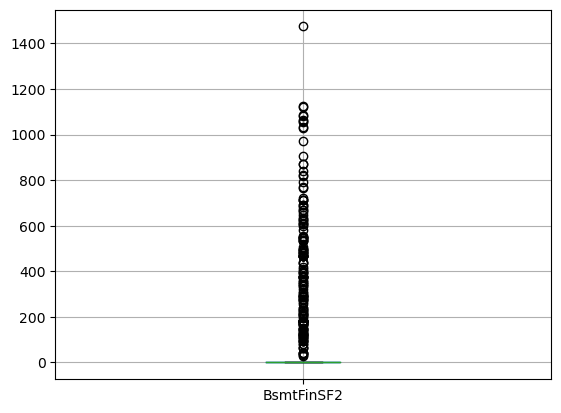

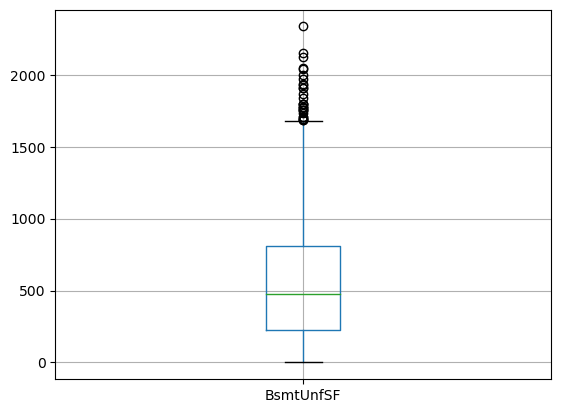

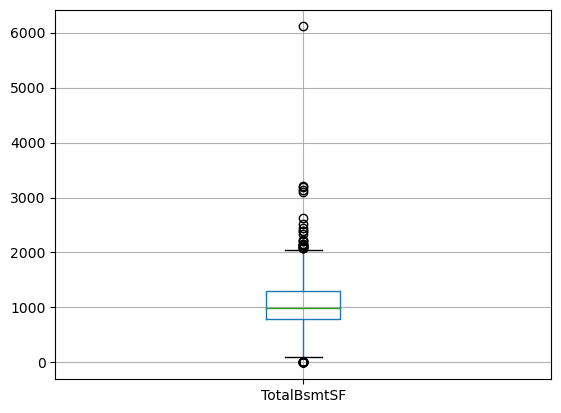

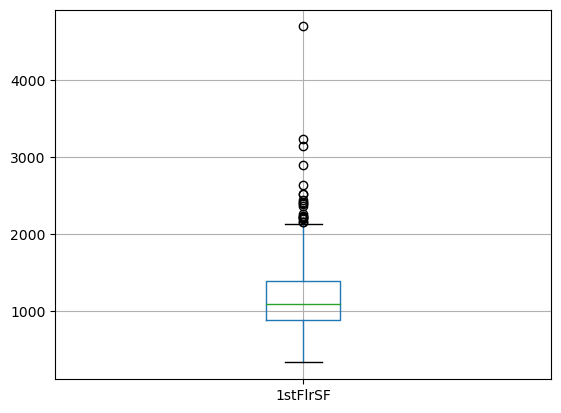

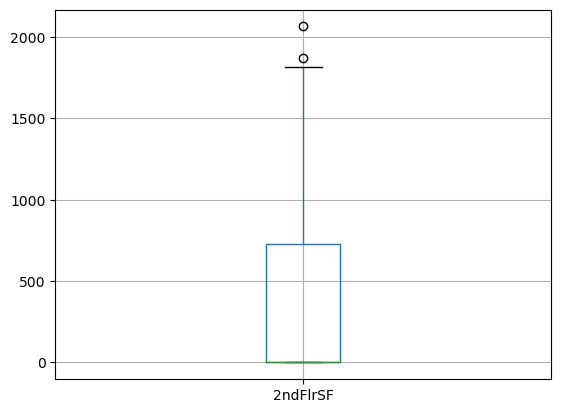

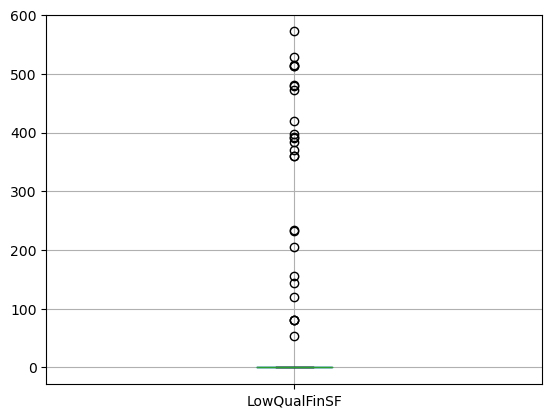

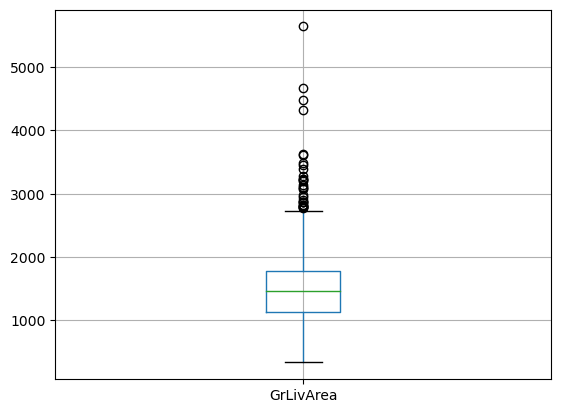

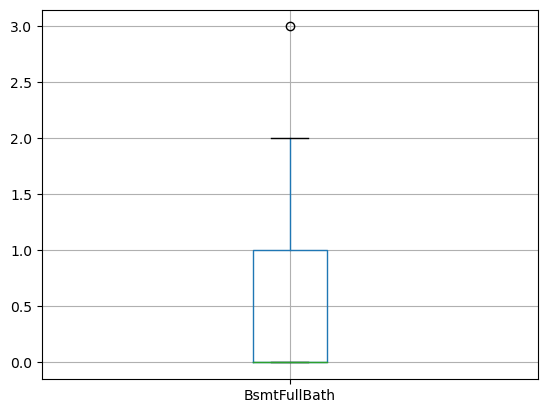

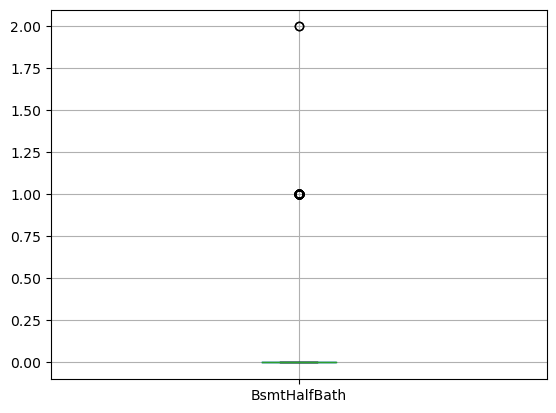

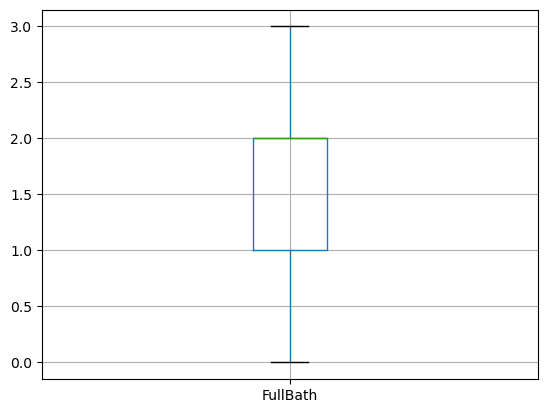

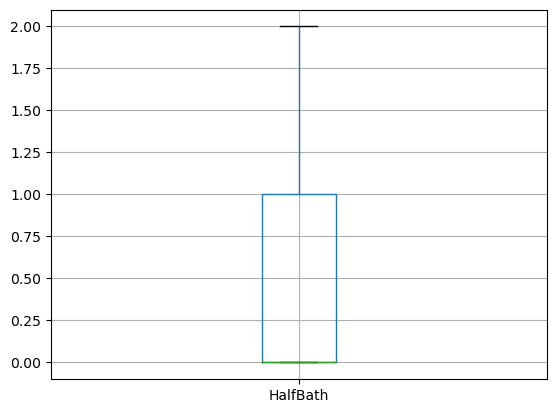

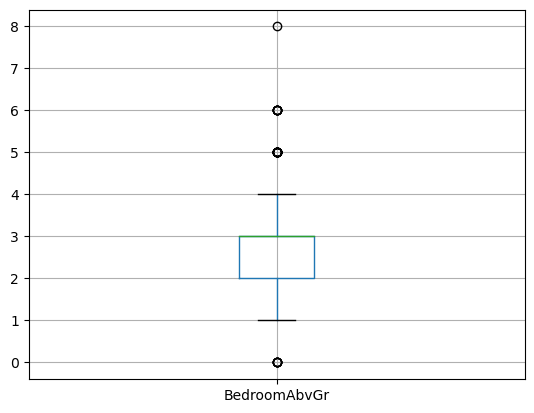

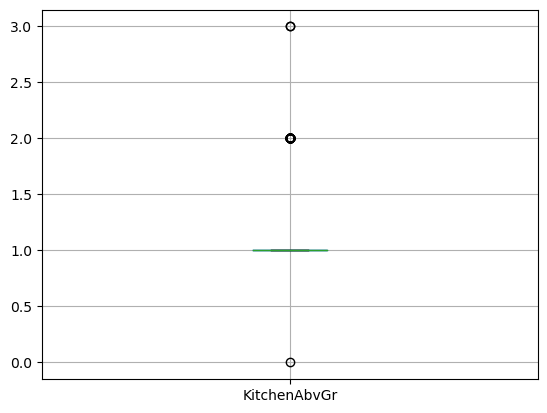

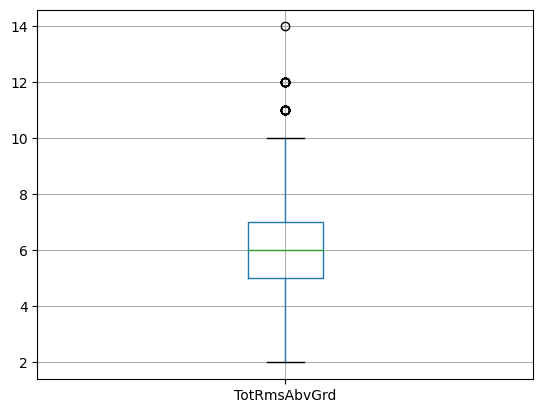

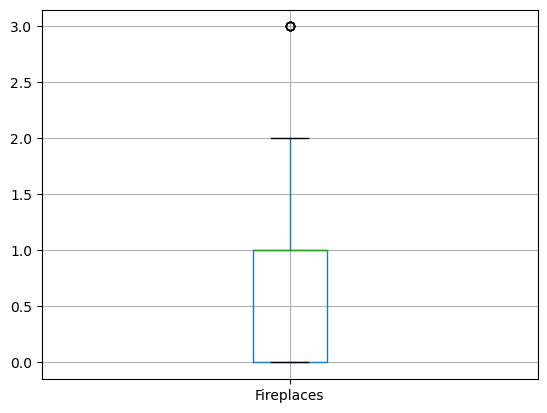

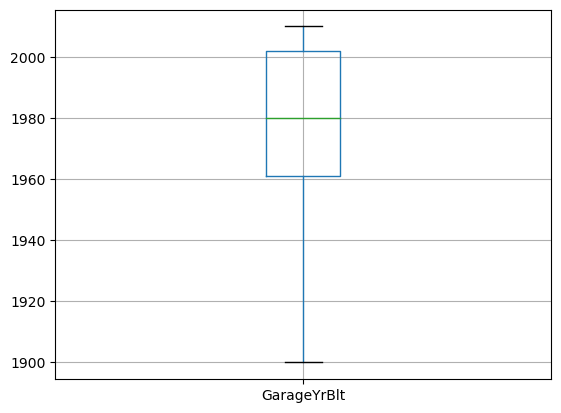

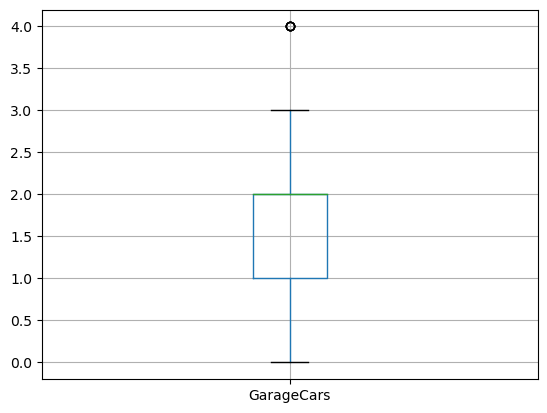

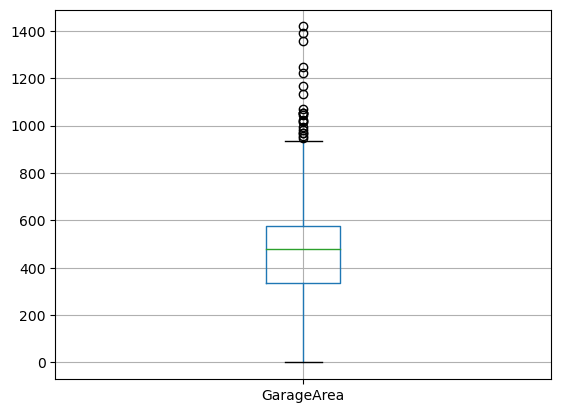

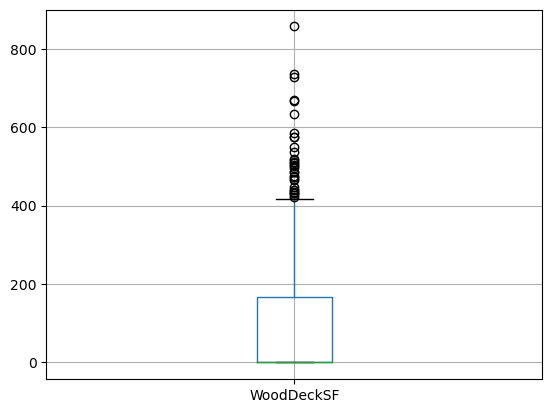

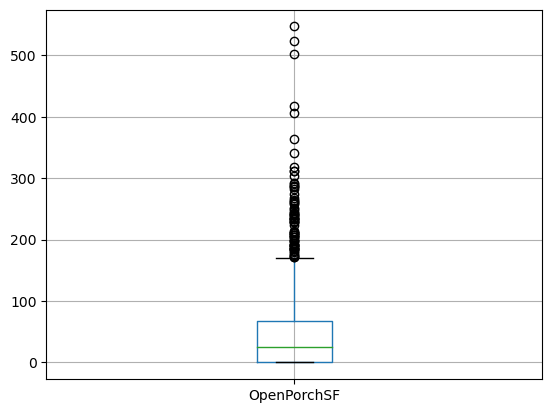

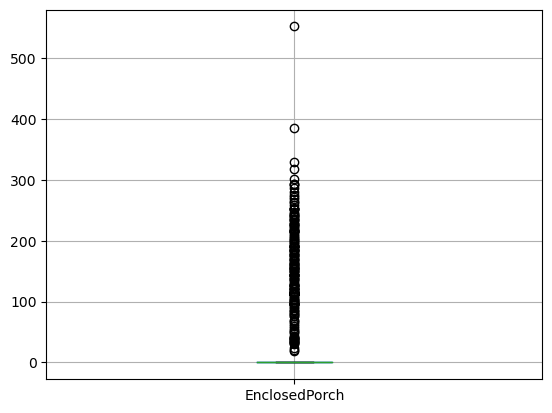

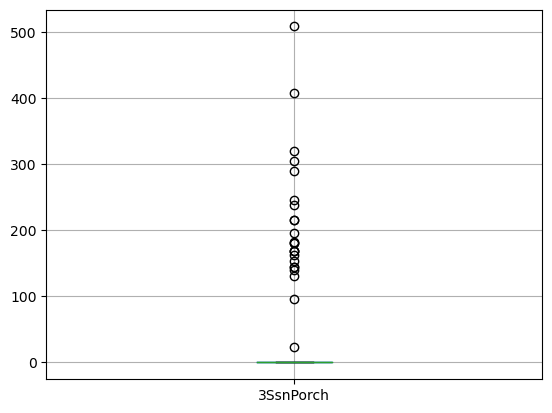

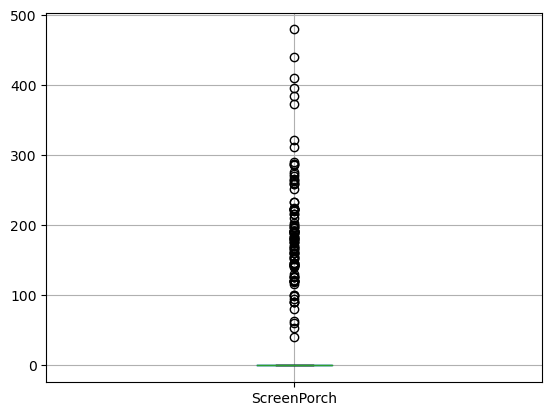

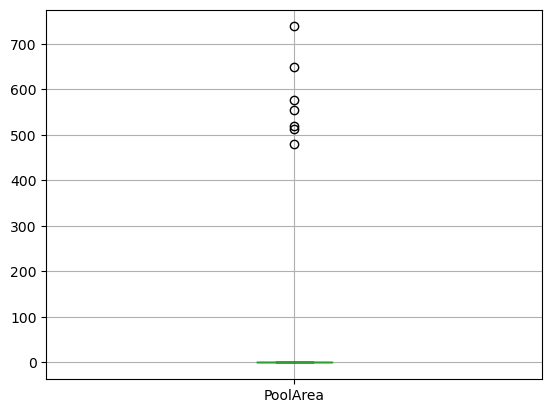

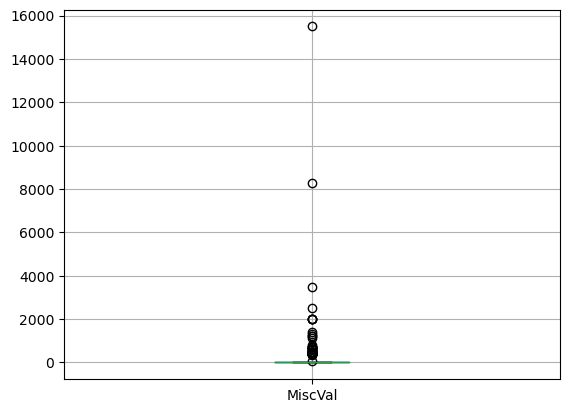

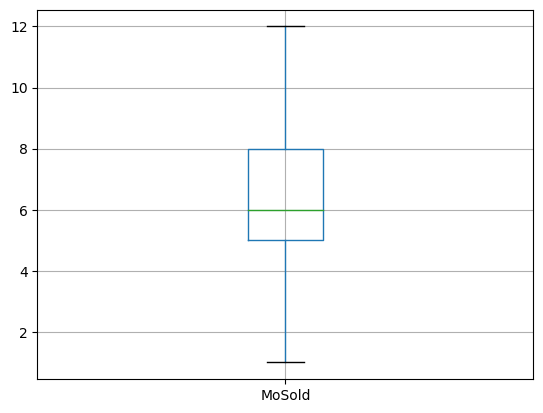

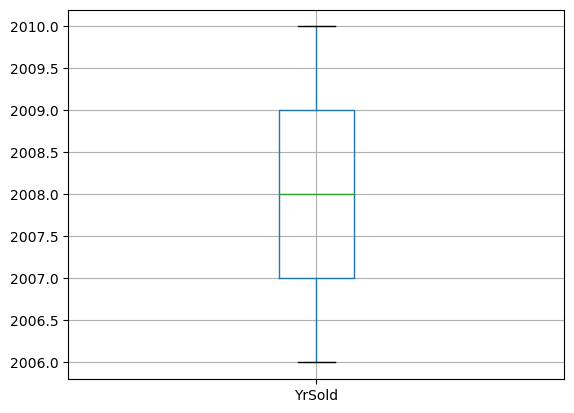

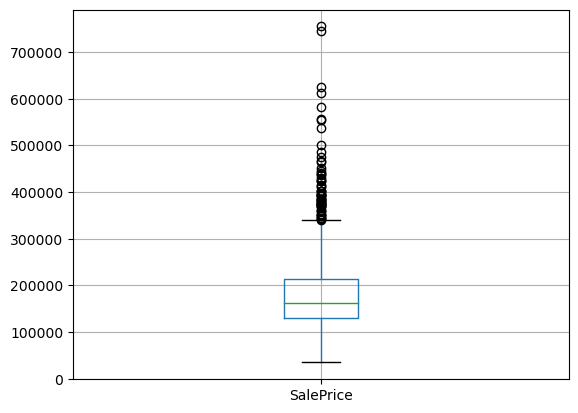

In [19]:
out = data.copy()

for i in num_feature:
    p25= out[i].quantile(0.25)
    p75 = out[i].quantile(0.75)
    iqr = p75-p25
    lw = p25-(1.5*iqr)
    uw = p75+(1.5*iqr)
    out[i]= np.where(out[i]<lw,lw,np.where(out[i]>uw,uw,out[i]))
    data.boxplot(column = i)
    plt.show()

## There are some features which have 0 as their IQR let's explore those features 

C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


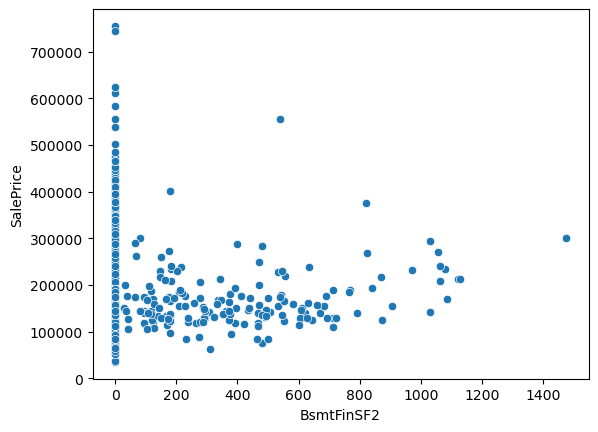

C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


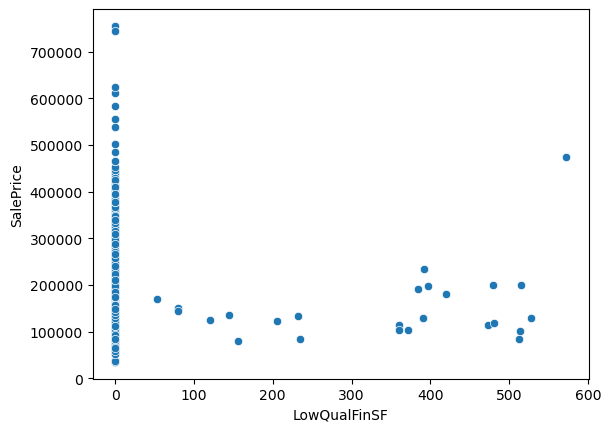

C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


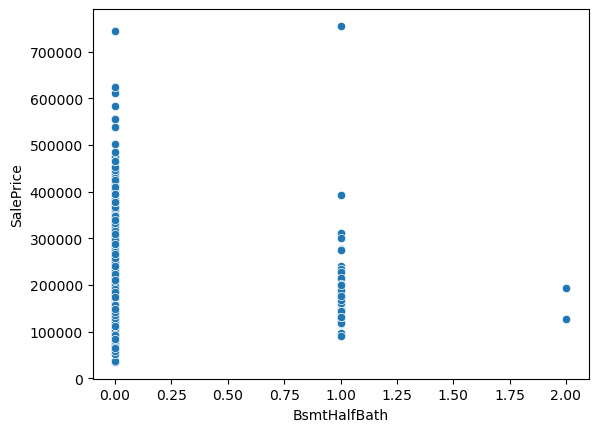

C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


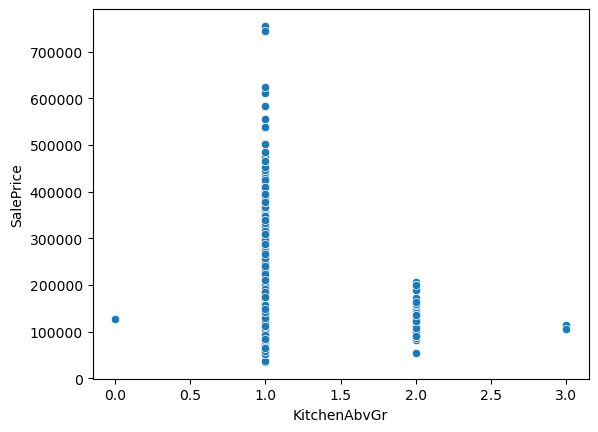

C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


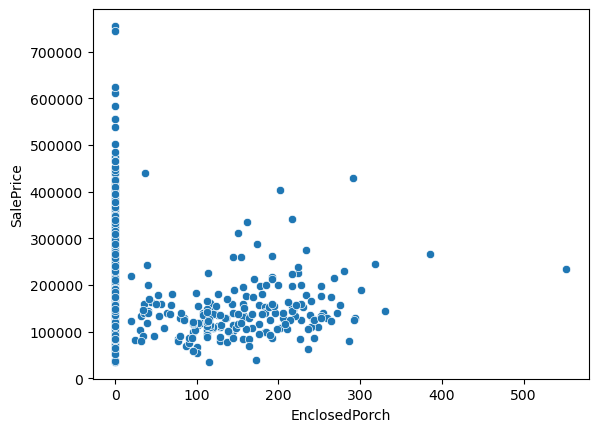

C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


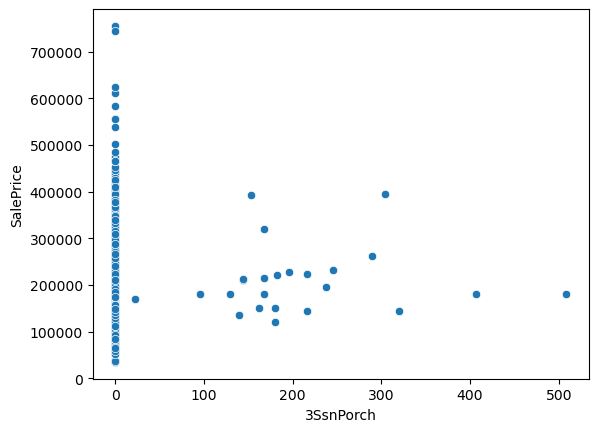

C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


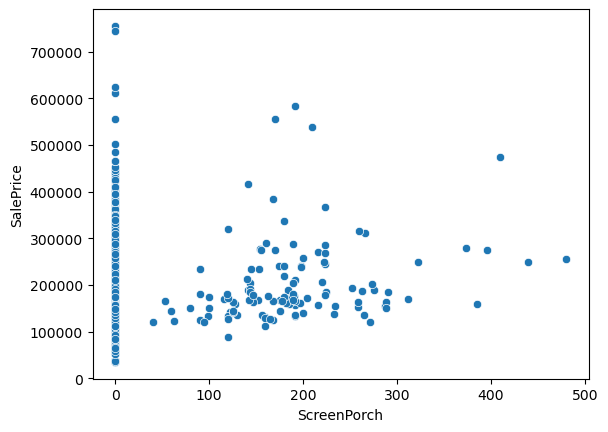

C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


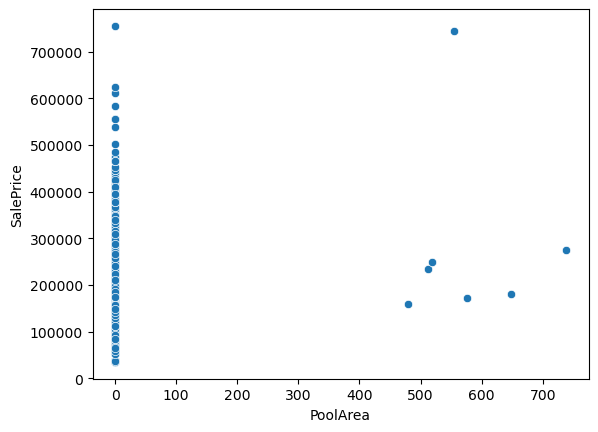

C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


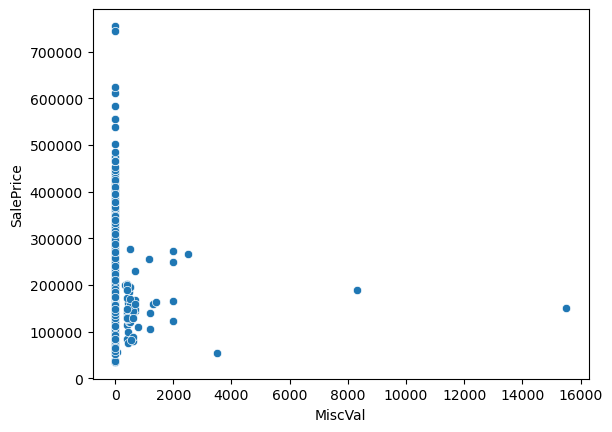

In [22]:
iqr1=[]
for i in num_feature:
    p25= out[i].quantile(0.25)
    p75 = out[i].quantile(0.75)
    iqr = p75-p25
    if iqr ==0:
        iqr1.append(i)
        sns.scatterplot(i,'SalePrice',data=data)
        plt.show()

In [23]:
temp=dataset[iqr1]
temp.corr()

,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
BsmtFinSF2,1.000000,0.014807,0.070948,-0.040751,0.036543,-0.029993,0.088871,0.041709,0.004940
LowQualFinSF,0.014807,1.000000,-0.005842,0.007522,0.061081,-0.004296,0.026799,0.062157,-0.003793
BsmtHalfBath,0.070948,-0.005842,1.000000,-0.037944,-0.008555,0.035114,0.032121,0.020025,-0.007367
KitchenAbvGr,-0.040751,0.007522,-0.037944,1.000000,0.037312,-0.024600,-0.051613,-0.014525,0.062341
EnclosedPorch,0.036543,0.061081,-0.008555,0.037312,1.000000,-0.037305,-0.082864,0.054203,0.018361
3SsnPorch,-0.029993,-0.004296,0.035114,-0.024600,-0.037305,1.000000,-0.031436,-0.007992,0.000354
ScreenPorch,0.088871,0.026799,0.032121,-0.051613,-0.082864,-0.031436,1.000000,0.051307,0.031946
PoolArea,0.041709,0.062157,0.020025,-0.014525,0.054203,-0.007992,0.051307,1.000000,0.029669
MiscVal,0.004940,-0.003793,-0.007367,0.062341,0.018361,0.000354,0.031946,0.029669,1.000000


## There is no correlation between these features and the dependent feature so we can drop these features for further analysis.

In [24]:
out.drop(iqr1,axis=1,inplace=True)

In [25]:
# for feature in continous_feature:
#     if feature != "SalePrice":
#         if 0 in out[feature].unique():
#             pass
#         else:
#             out[feature]= np.log(out[feature])
#     #         data['SalePrice']=np.log(data['SalePrice'])
#             sns.histplot(data = out ,x=feature)
#             plt.show()

## Let's explore the categorical features 

In [26]:
cat_feature = [ i for i in out.columns if out[i].dtypes == 'O']
cat_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [27]:
out[cat_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# let's check for the cardinality rate or number of categories in each categorical feature 

In [28]:
for i in cat_feature:
    print(f"the feature is {i} and number of categories are {len(out[i].unique())}")

the feature is MSZoning and number of categories are 5
the feature is Street and number of categories are 2
the feature is Alley and number of categories are 3
the feature is LotShape and number of categories are 4
the feature is LandContour and number of categories are 4
the feature is Utilities and number of categories are 2
the feature is LotConfig and number of categories are 5
the feature is LandSlope and number of categories are 3
the feature is Neighborhood and number of categories are 25
the feature is Condition1 and number of categories are 9
the feature is Condition2 and number of categories are 8
the feature is BldgType and number of categories are 5
the feature is HouseStyle and number of categories are 8
the feature is RoofStyle and number of categories are 6
the feature is RoofMatl and number of categories are 8
the feature is Exterior1st and number of categories are 15
the feature is Exterior2nd and number of categories are 16
the feature is MasVnrType and number of cate

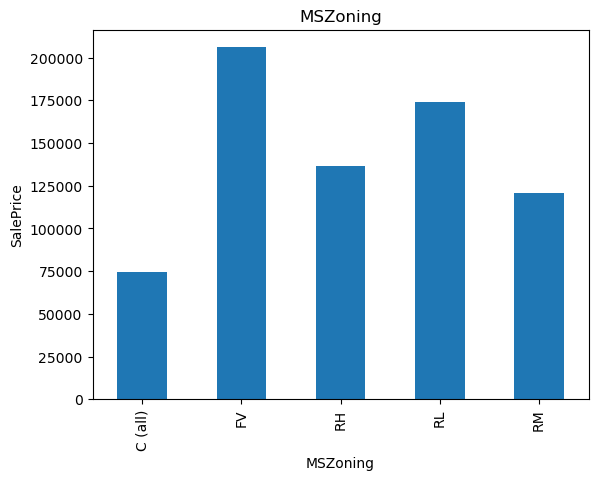

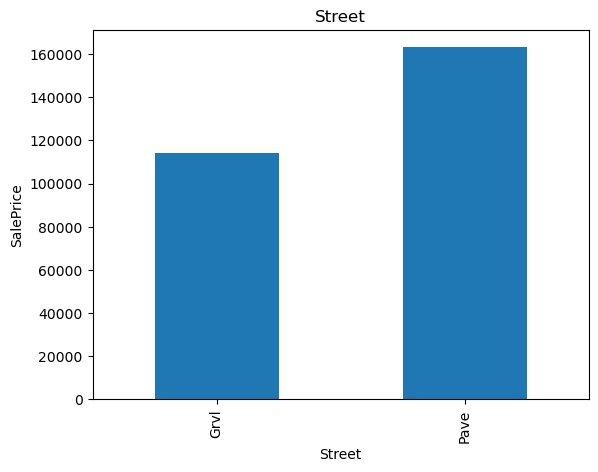

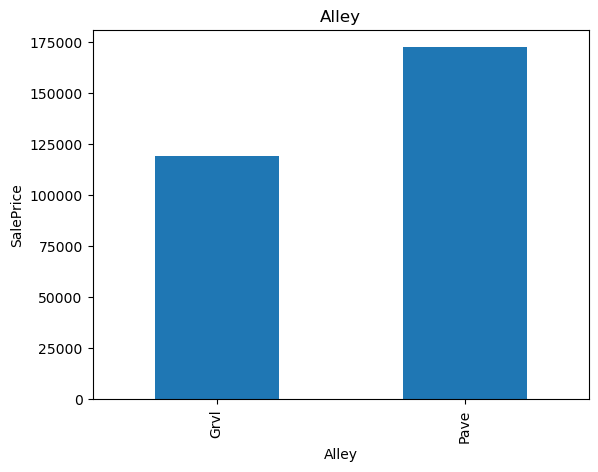

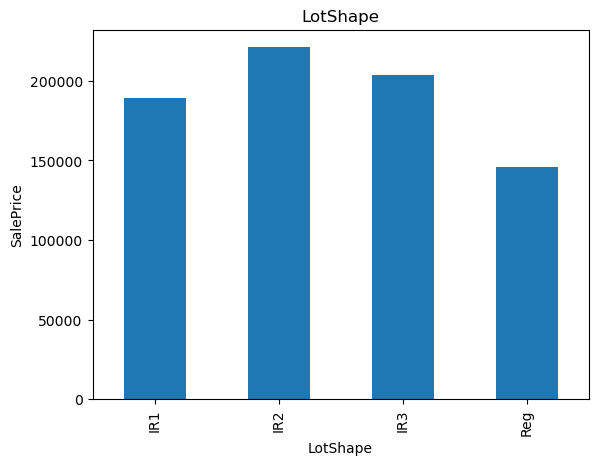

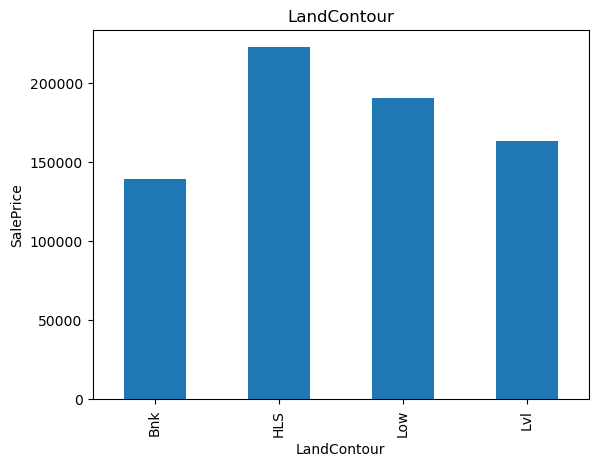

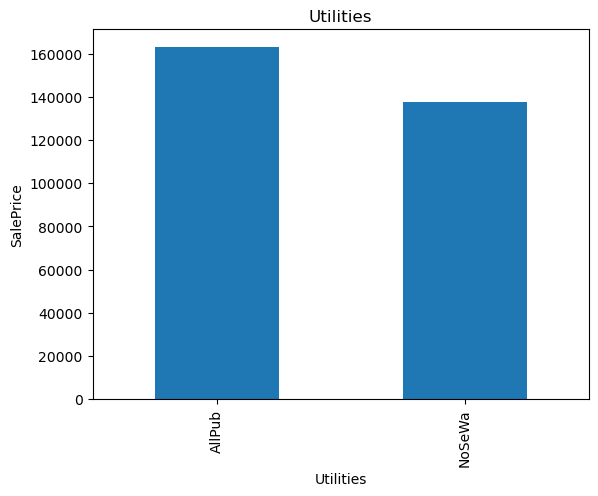

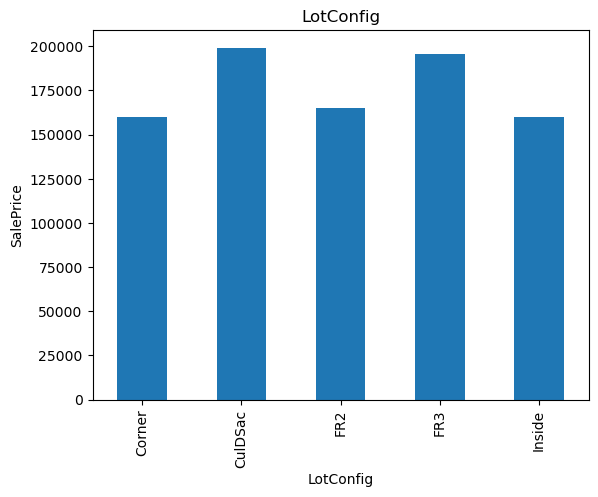

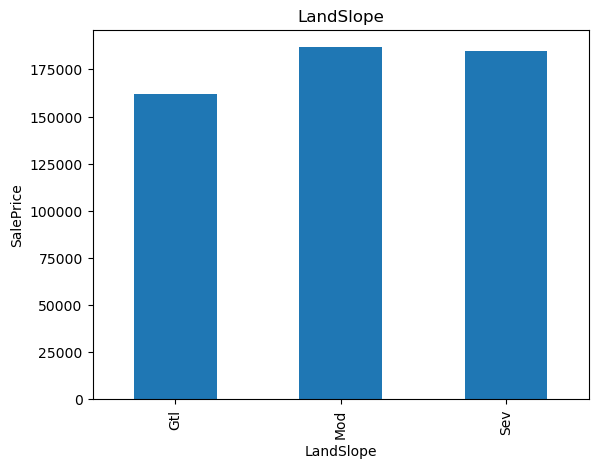

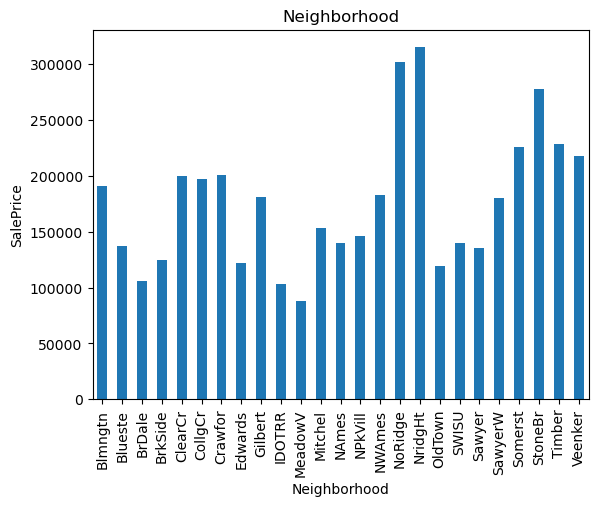

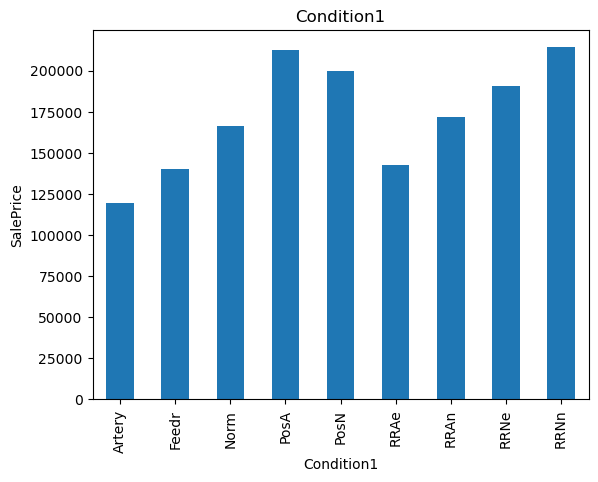

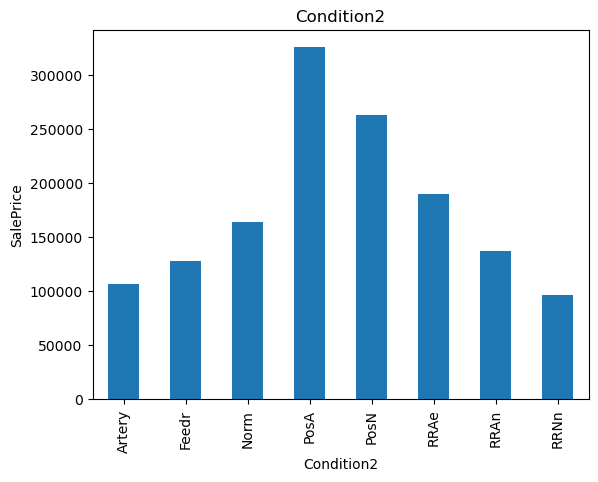

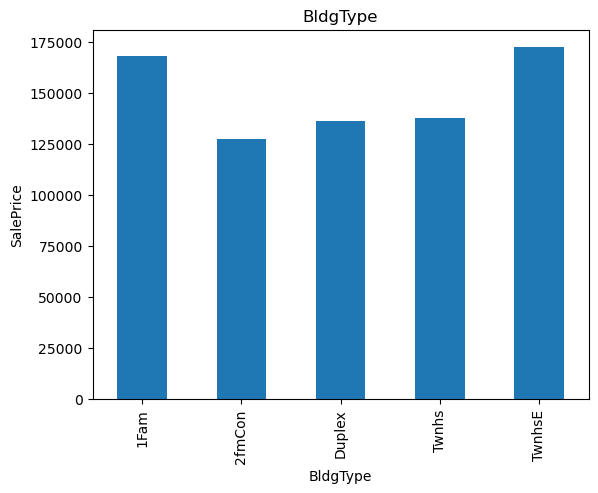

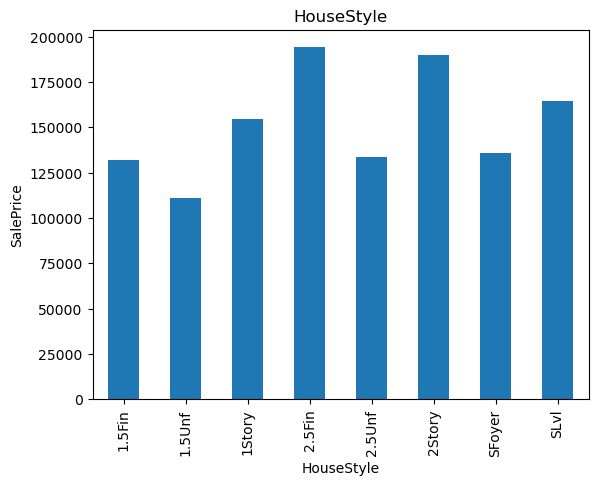

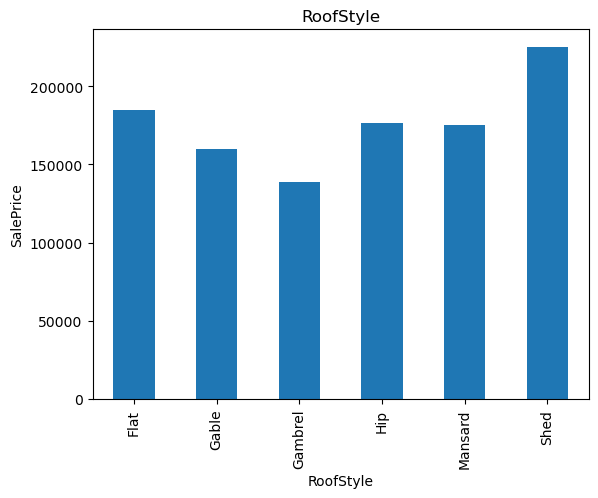

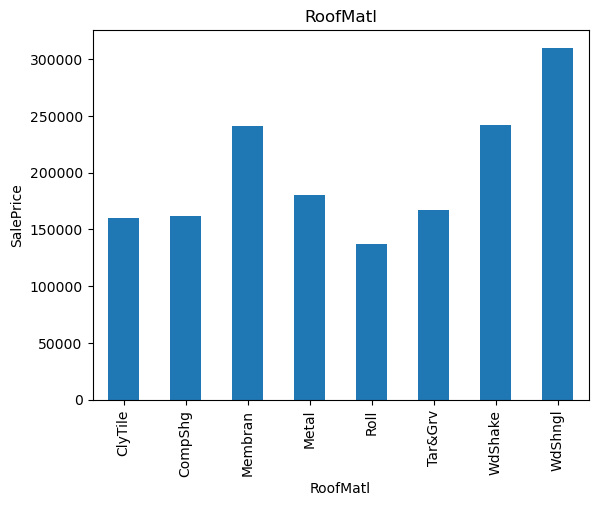

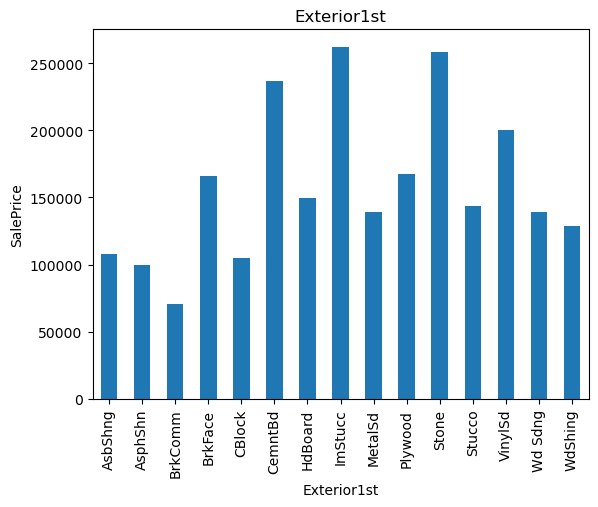

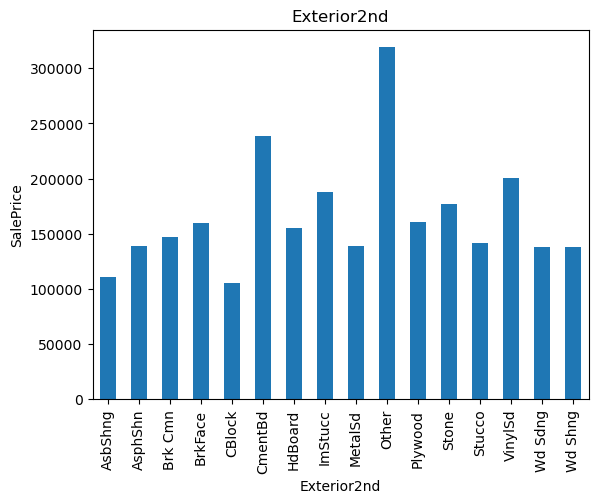

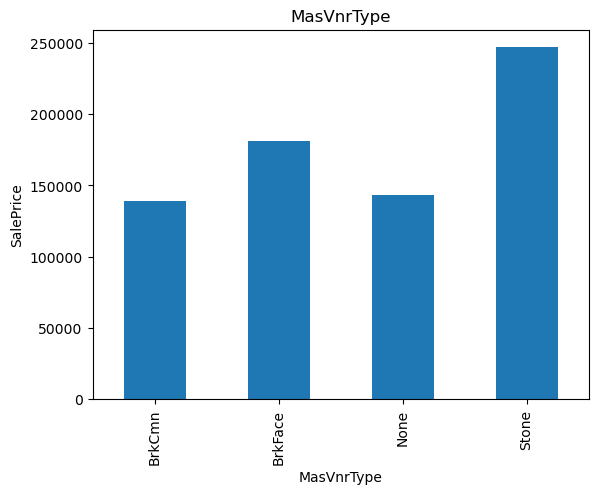

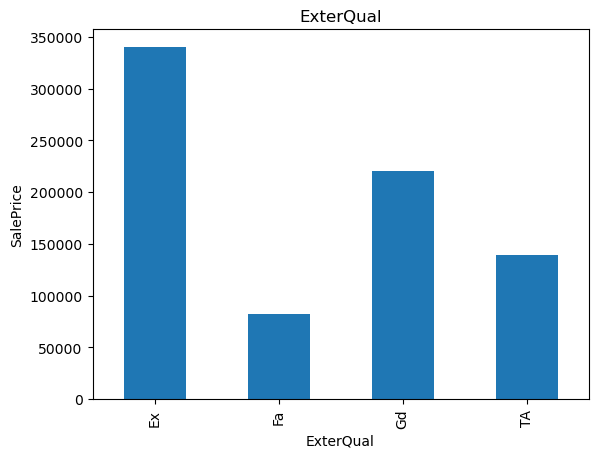

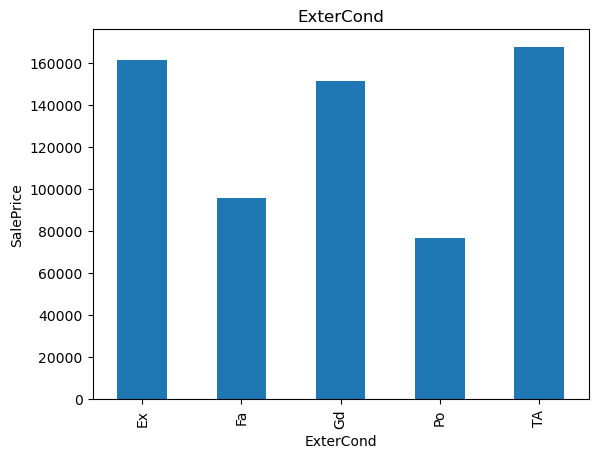

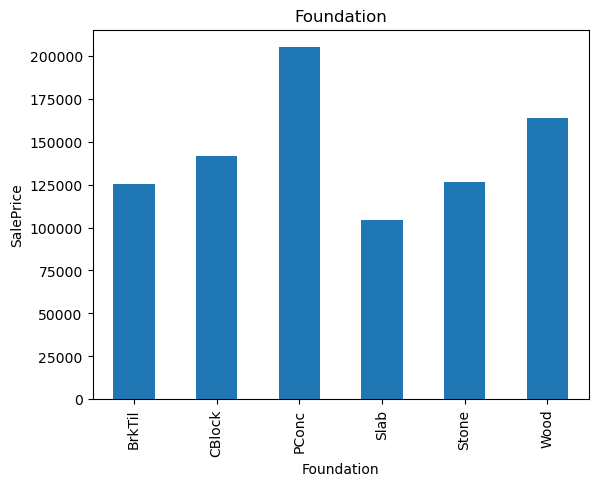

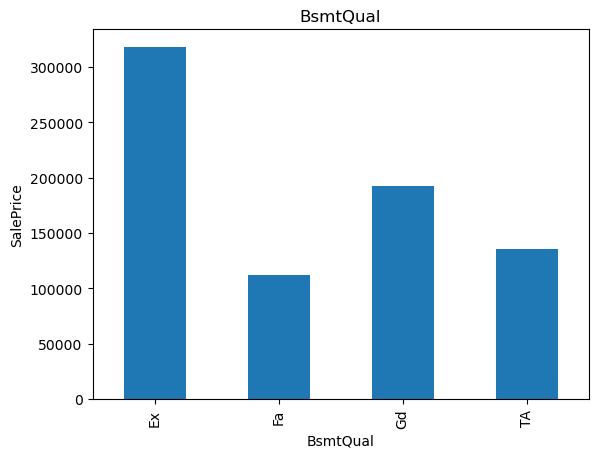

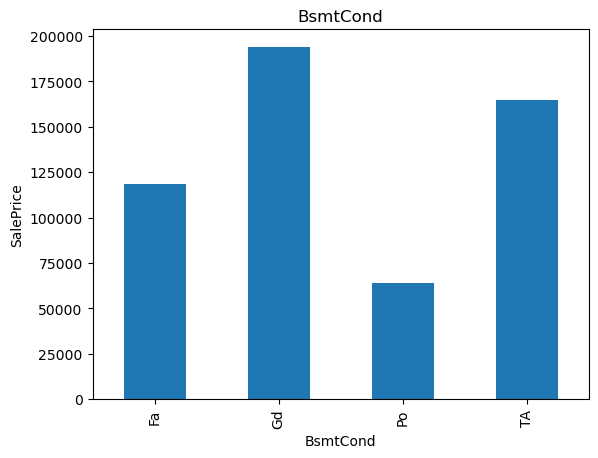

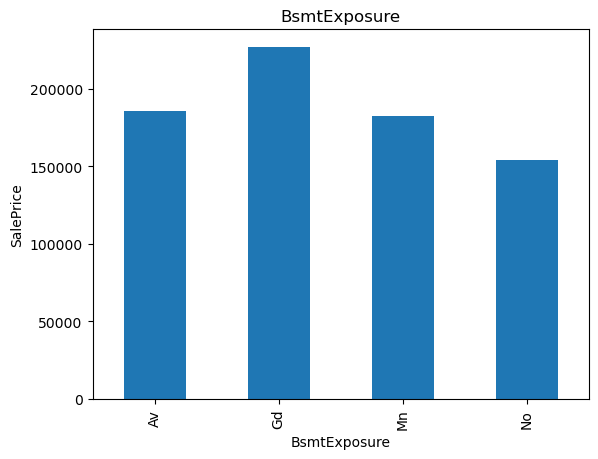

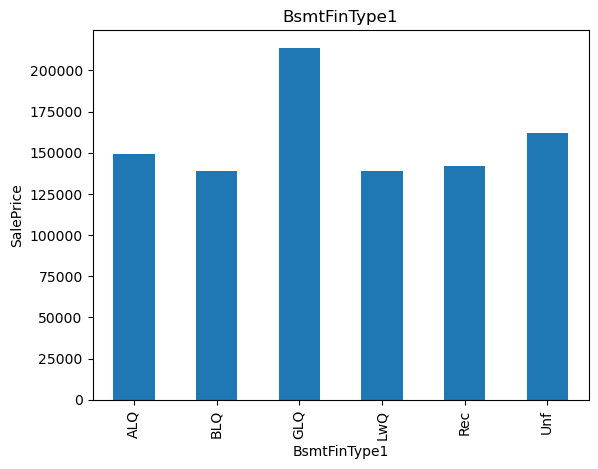

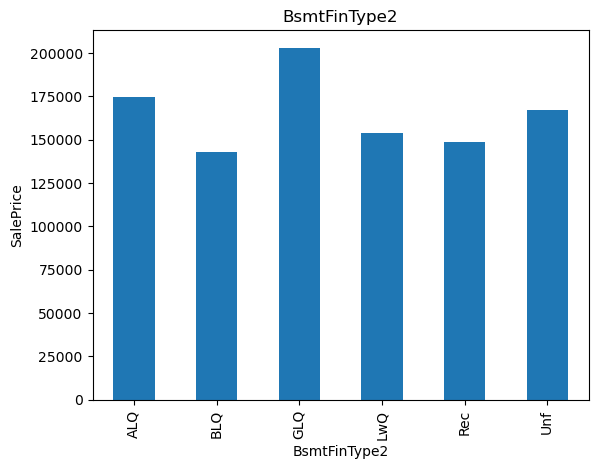

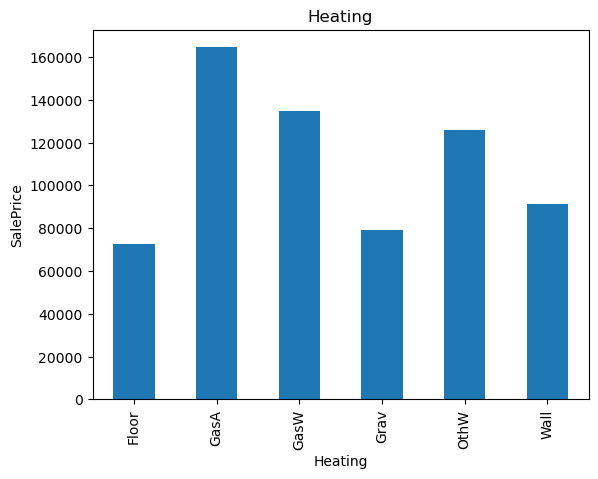

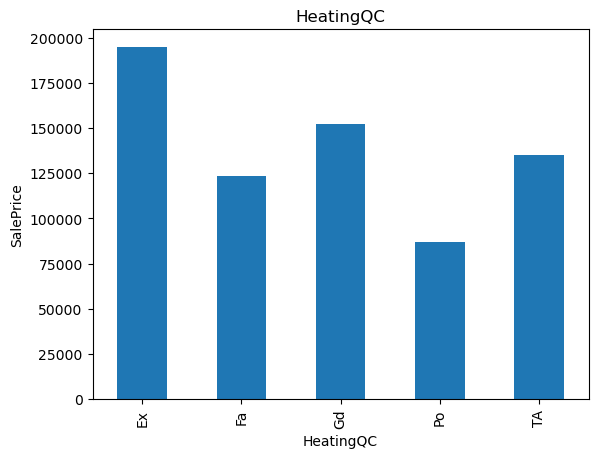

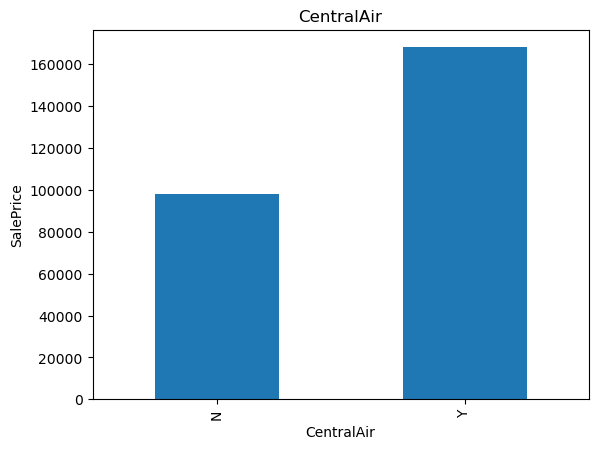

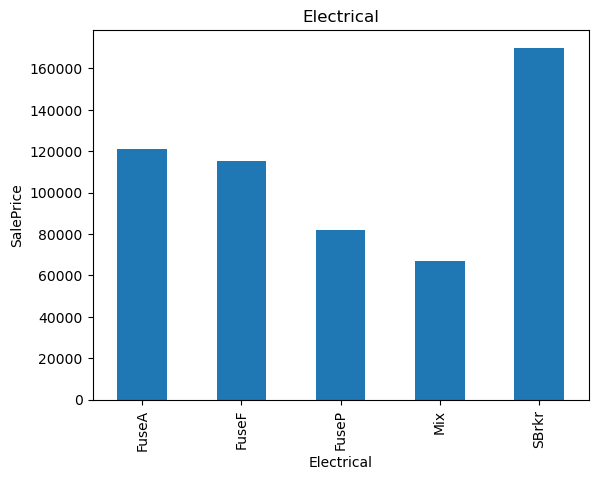

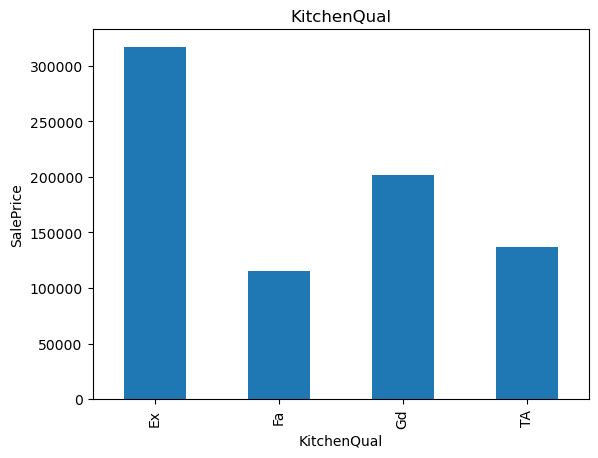

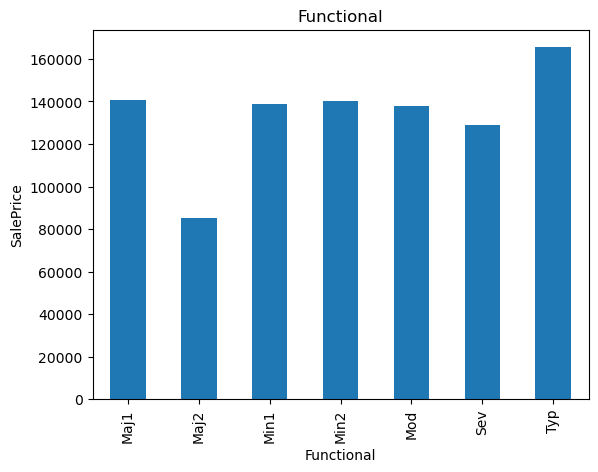

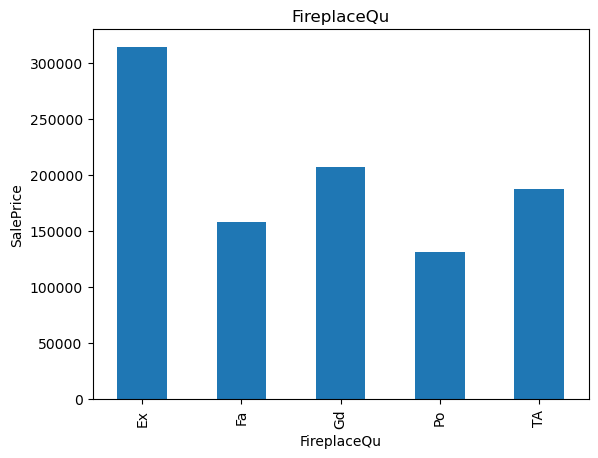

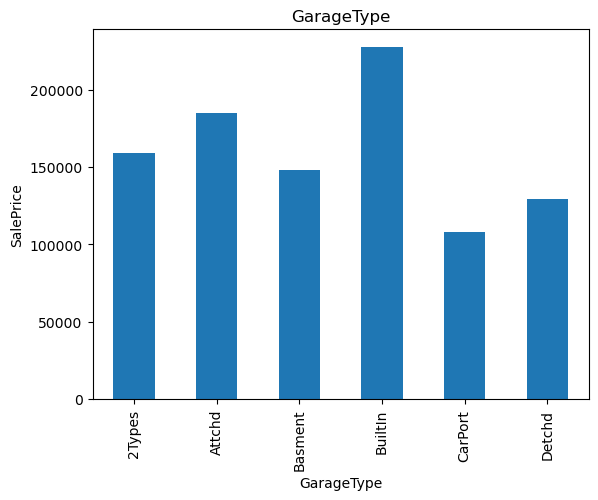

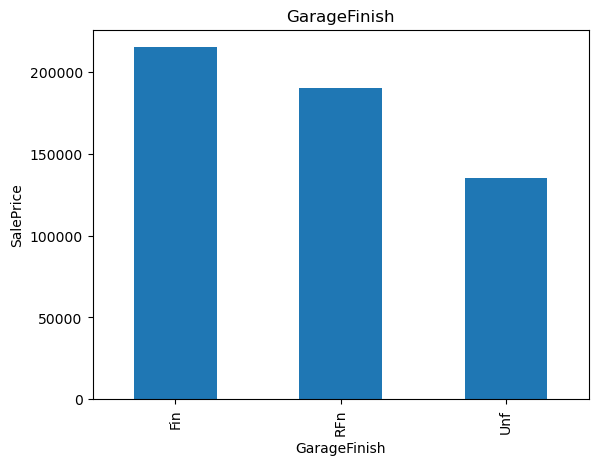

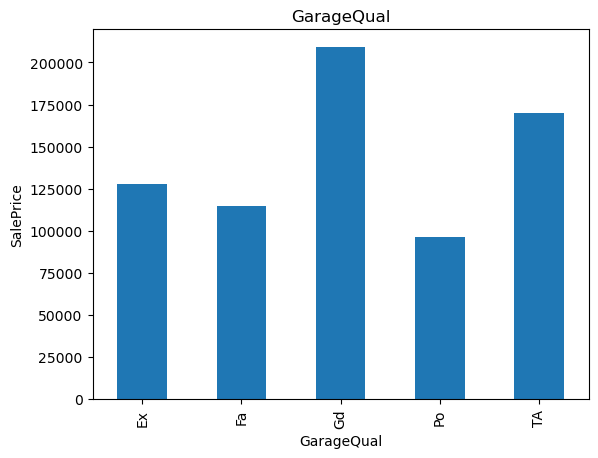

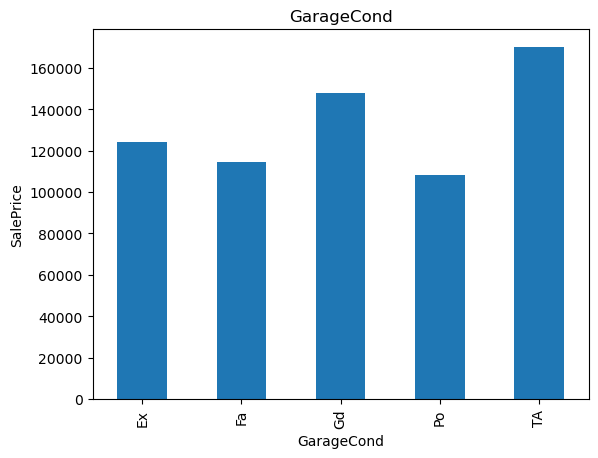

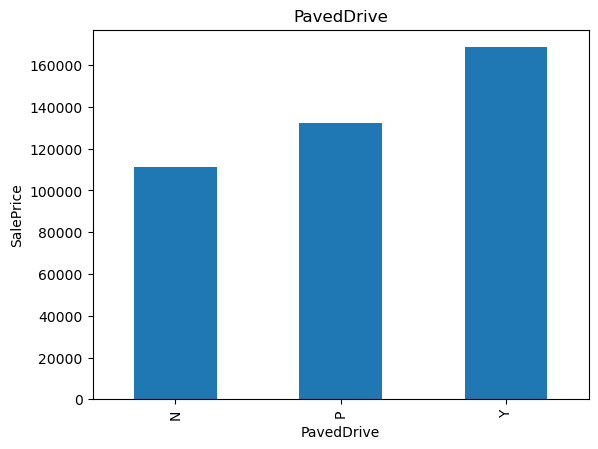

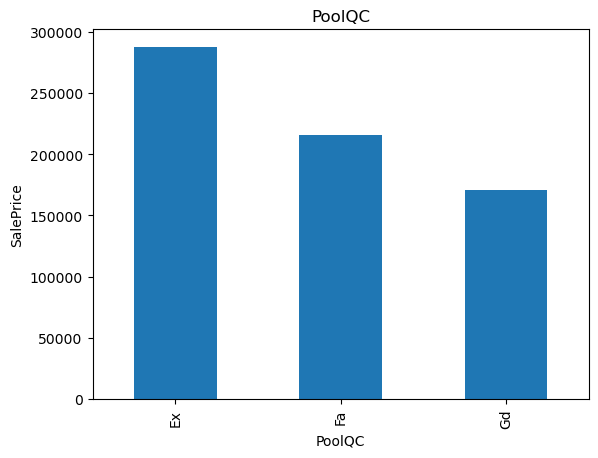

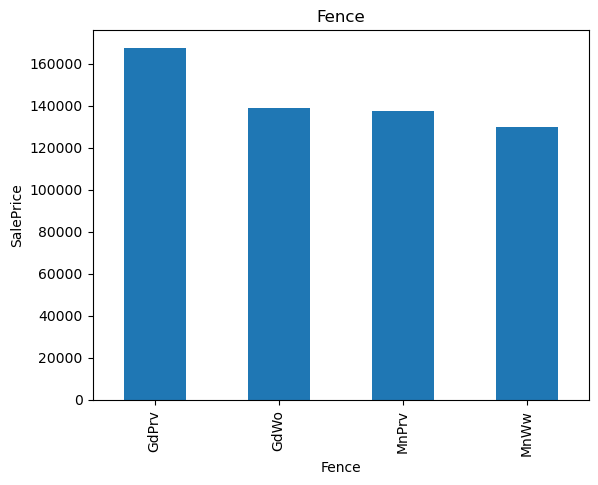

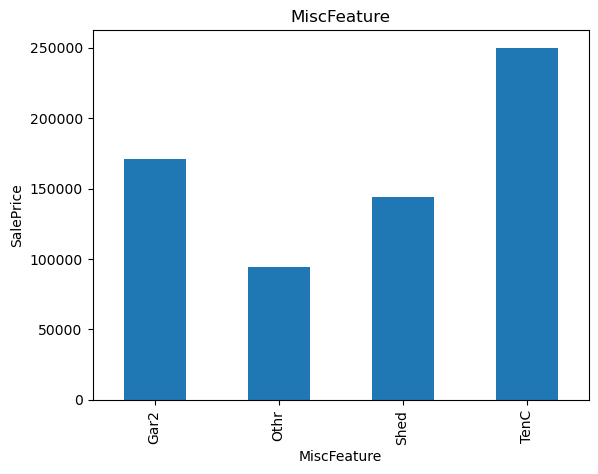

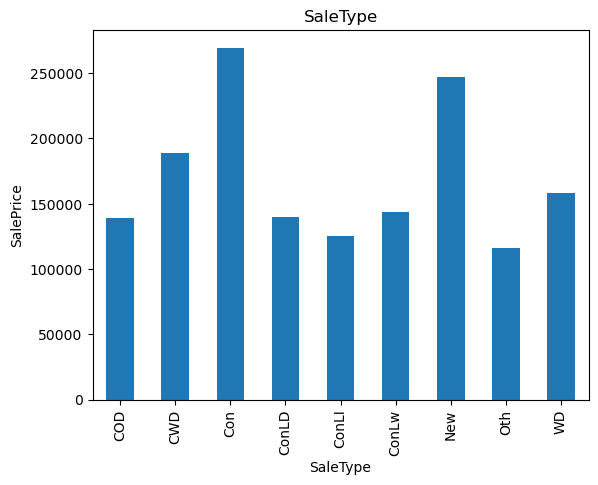

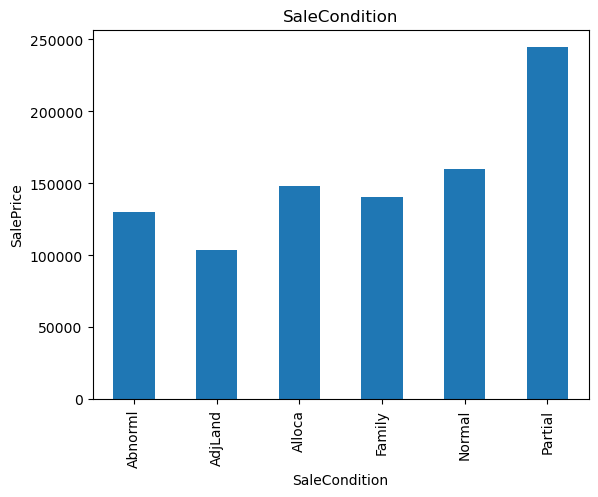

In [25]:
# lets check the relationship bw categorical features and Saleprice 
for i in cat_feature:
    out.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.title(i)
    plt.show()


# Feature Engineering 

* missing values 
* temporal variables 
* categorical variable : remove rare lables
* standardise the values of variables to the same range 

In [78]:
out.shape

(1460, 75)

In [79]:
# missing values imputation for categorical 

cat_nan = [ i for i in out.columns if out[i].isna().sum()>0 and out[i].dtype =='O']
cat_nan
for i in cat_nan:
    print(f"{i}: {np.round(out[i].isna().mean(),4)}% Missing values")

In [80]:
# replaceing allthe nan with new label 

def replacecatna(data,feature):
#     data = df.copy()
    data[feature]= data[feature].fillna("Missing")
    return data


df=replacecatna(out,cat_nan)
df[cat_nan].isna().sum()

Series([], dtype: float64)

In [81]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenull,MasVnrAreanull,GarageYrBltnull
0,1.0,60.0,2,65.0,8450.0,0,1,2,3,0,3,0,4,2,0,0,2,7.0,5.0,5.0,5.0,0,0,7,7,1,196.0,1,2,2,2,3,4,2,706.0,5,150.0,856.0,0,0,1,2,856.0,854.0,1710.0,1.0,2.0,1.0,3.0,2,8.0,3,0.0,3,0,5.0,2,2.0,548.0,2,2,2,0.0,61.0,0,2,0,2.0,2008.0,2,2,208500.0,0,0,0
1,2.0,20.0,2,80.0,9600.0,0,1,2,3,0,2,0,22,1,0,0,1,6.0,7.5,31.0,31.0,0,0,4,4,2,0.0,2,2,1,2,3,1,0,978.0,5,284.0,1262.0,0,0,1,2,1262.0,0.0,1262.0,0.0,2.0,0.0,3.0,3,6.0,3,1.0,5,0,31.0,2,2.0,460.0,2,2,2,298.0,0.0,0,2,0,5.0,2007.0,2,2,181500.0,0,0,0
2,3.0,60.0,2,68.0,11250.0,0,1,0,3,0,3,0,4,2,0,0,2,7.0,5.0,7.0,6.0,0,0,7,7,1,162.0,1,2,2,2,3,3,2,486.0,5,434.0,920.0,0,0,1,2,920.0,866.0,1786.0,1.0,2.0,1.0,3.0,2,6.0,3,1.0,5,0,7.0,2,2.0,608.0,2,2,2,0.0,42.0,0,2,0,9.0,2008.0,2,2,223500.0,0,0,0
3,4.0,70.0,2,60.0,9550.0,0,1,0,3,0,0,0,5,2,0,0,2,7.0,5.0,91.0,36.0,0,0,8,9,2,0.0,2,2,0,4,1,4,0,216.0,5,540.0,756.0,0,2,1,2,961.0,756.0,1717.0,1.0,1.0,0.0,3.0,2,7.0,3,1.0,2,3,8.0,3,3.0,642.0,2,2,2,0.0,35.0,0,2,0,2.0,2006.0,2,0,140000.0,0,0,0
4,5.0,60.0,2,84.0,14260.0,0,1,0,3,0,2,0,13,2,0,0,2,8.0,5.0,8.0,8.0,0,0,7,7,1,350.0,1,2,2,2,3,0,2,655.0,5,490.0,1145.0,0,0,1,2,1145.0,1053.0,2198.0,1.0,2.0,1.0,4.0,2,9.0,3,1.0,5,0,8.0,2,3.0,836.0,2,2,2,192.0,84.0,0,2,0,12.0,2008.0,2,2,250000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,2,62.0,7917.0,0,1,2,3,0,3,0,7,2,0,0,2,6.0,5.0,8.0,7.0,0,0,7,7,2,0.0,2,2,2,2,3,4,6,0.0,5,953.0,953.0,0,0,1,2,953.0,694.0,1647.0,0.0,2.0,1.0,3.0,3,7.0,3,1.0,5,0,8.0,2,2.0,460.0,2,2,2,0.0,40.0,0,2,0,8.0,2007.0,2,2,175000.0,0,0,0
1456,1457.0,20.0,2,85.0,13175.0,0,1,2,3,0,3,0,12,2,0,0,1,6.0,6.0,32.0,22.0,0,0,5,5,3,119.0,2,2,1,2,3,4,0,790.0,4,589.0,1542.0,0,3,1,2,2073.0,0.0,2073.0,1.0,2.0,0.0,3.0,3,7.0,0,2.0,5,0,32.0,3,2.0,500.0,2,2,2,349.0,0.0,0,3,0,2.0,2010.0,2,2,210000.0,0,0,0
1457,1458.0,70.0,2,66.0,9042.0,0,1,2,3,0,3,0,5,2,0,0,2,7.0,7.5,69.0,4.0,0,0,2,2,2,0.0,0,1,4,4,1,4,2,275.0,5,877.0,1152.0,0,0,1,2,1188.0,1152.0,2340.0,0.0,2.0,0.0,4.0,2,9.0,3,2.0,2,0,69.0,2,1.0,252.0,2,2,2,0.0,60.0,0,0,1,5.0,2010.0,2,2,266500.0,0,0,0
1458,1459.0,20.0,2,68.0,9717.0,0,1,2,3,0,3,0,11,2,0,0,1,5.0,6.0,60.0,14.0,1,0,4,4,2,0.0,2,2,1,4,3,3,2,49.0,4,0.0,1078.0,0,2,1,0,1078.0,0.0,1078.0,1.0,1.0,0.0,2.0,2,5.0,3,0.0,3,0,60.0,3,1.0,240.0,2,2,2,366.0,0.0,0,2,0,4.0,2010.0,2,2,142125.0,0,0,0


# imputing null values in numerical features 

In [82]:
numeric_nan = [ i for i in df.columns if df[i].dtypes!='O' and df[i].isna().sum()>1]
numeric_nan

for i in numeric_nan:
    print(f"{i}: {np.round(df[i].isna().mean(),4)}% Missing values")

In [83]:
for i in numeric_nan:
    median = df[i].median()
    
# to keep track of numerical null records weabs create a new feature 
    df[i+'null'] = np.where(df[i].isna(),1,0)
#now let's impute the actual null values 
    df[i].fillna(median,inplace = True)
    
df[numeric_nan].isna().sum() 

Series([], dtype: float64)

# Let's handle the temporal variables 

* let's convert year_build feature to how many year its been and vice versa with all the date feeatures

In [84]:
for i in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[i]= df['YrSold']-df[i]
    

In [85]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003.0,2003.0,2003.0
1,1976.0,1976.0,1976.0
2,2001.0,2002.0,2001.0
3,1915.0,1970.0,1998.0
4,2000.0,2000.0,2000.0


In [86]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenull,MasVnrAreanull,GarageYrBltnull
0,1.0,60.0,2,65.0,8450.0,0,1,2,3,0,3,0,4,2,0,0,2,7.0,5.0,2003.0,2003.0,0,0,7,7,1,196.0,1,2,2,2,3,4,2,706.0,5,150.0,856.0,0,0,1,2,856.0,854.0,1710.0,1.0,2.0,1.0,3.0,2,8.0,3,0.0,3,0,2003.0,2,2.0,548.0,2,2,2,0.0,61.0,0,2,0,2.0,2008.0,2,2,208500.0,0,0,0
1,2.0,20.0,2,80.0,9600.0,0,1,2,3,0,2,0,22,1,0,0,1,6.0,7.5,1976.0,1976.0,0,0,4,4,2,0.0,2,2,1,2,3,1,0,978.0,5,284.0,1262.0,0,0,1,2,1262.0,0.0,1262.0,0.0,2.0,0.0,3.0,3,6.0,3,1.0,5,0,1976.0,2,2.0,460.0,2,2,2,298.0,0.0,0,2,0,5.0,2007.0,2,2,181500.0,0,0,0
2,3.0,60.0,2,68.0,11250.0,0,1,0,3,0,3,0,4,2,0,0,2,7.0,5.0,2001.0,2002.0,0,0,7,7,1,162.0,1,2,2,2,3,3,2,486.0,5,434.0,920.0,0,0,1,2,920.0,866.0,1786.0,1.0,2.0,1.0,3.0,2,6.0,3,1.0,5,0,2001.0,2,2.0,608.0,2,2,2,0.0,42.0,0,2,0,9.0,2008.0,2,2,223500.0,0,0,0
3,4.0,70.0,2,60.0,9550.0,0,1,0,3,0,0,0,5,2,0,0,2,7.0,5.0,1915.0,1970.0,0,0,8,9,2,0.0,2,2,0,4,1,4,0,216.0,5,540.0,756.0,0,2,1,2,961.0,756.0,1717.0,1.0,1.0,0.0,3.0,2,7.0,3,1.0,2,3,1998.0,3,3.0,642.0,2,2,2,0.0,35.0,0,2,0,2.0,2006.0,2,0,140000.0,0,0,0
4,5.0,60.0,2,84.0,14260.0,0,1,0,3,0,2,0,13,2,0,0,2,8.0,5.0,2000.0,2000.0,0,0,7,7,1,350.0,1,2,2,2,3,0,2,655.0,5,490.0,1145.0,0,0,1,2,1145.0,1053.0,2198.0,1.0,2.0,1.0,4.0,2,9.0,3,1.0,5,0,2000.0,2,3.0,836.0,2,2,2,192.0,84.0,0,2,0,12.0,2008.0,2,2,250000.0,0,0,0


## Let,s transform the numerical features which is skewed 

In [87]:
num_tr = [ i for i in df.columns if df[i].dtypes != 'O' 
          and len(df[i].unique())>25 and 0 not in df[i].unique() 
          and "Yr" not in i and "Year" not in i and i != "Id"]
num_tr

['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'SalePrice']

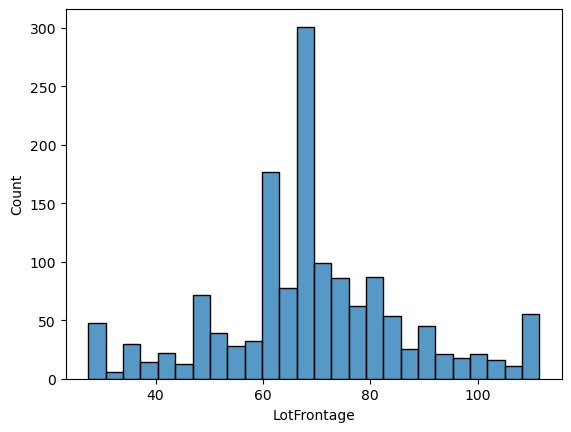

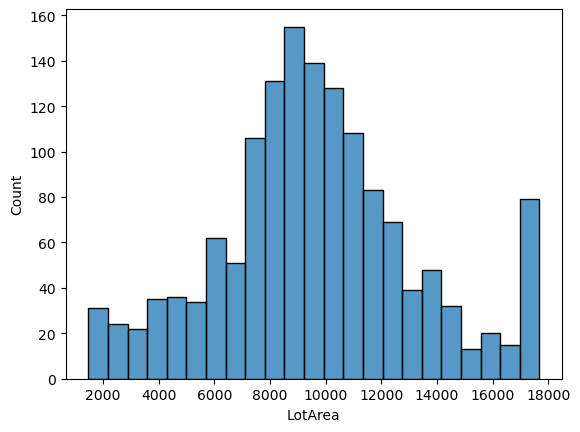

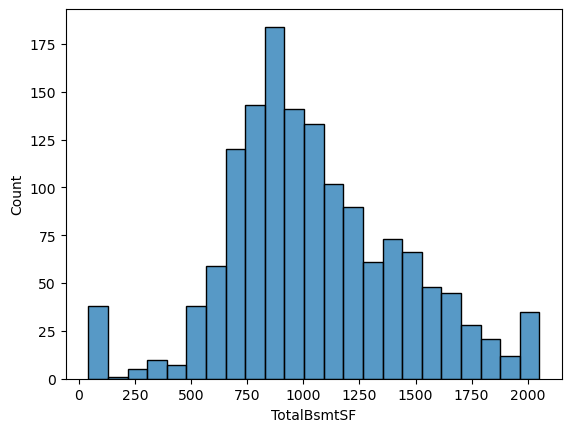

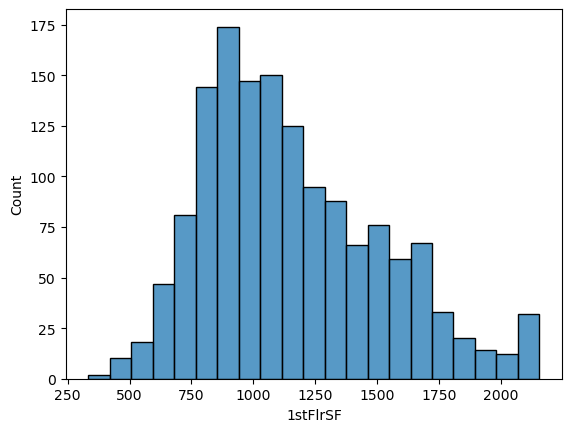

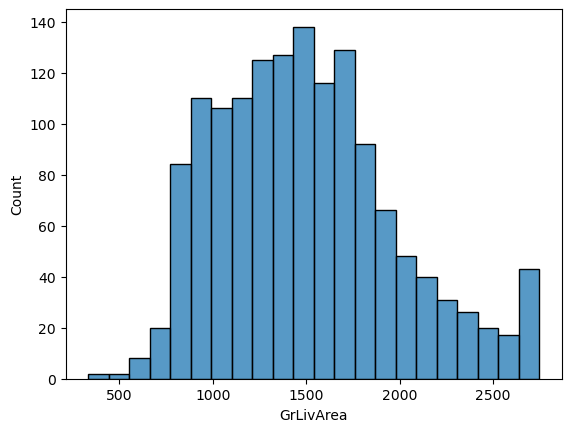

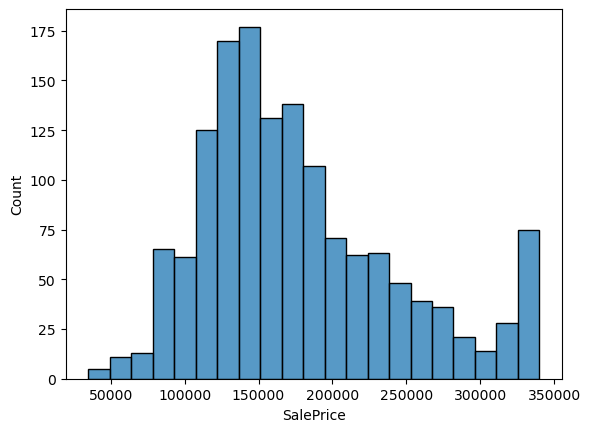

In [89]:
for i in num_tr:
#     dataset[i]=np.log(df[i])
    sns.histplot(data=df,x=i)
    plt.show()

In [90]:
for i in num_tr:
    print(i,df[i].skew())

LotFrontage 0.1035638720651804
LotArea 0.2084915461280305
TotalBsmtSF 0.23723979387579908
1stFlrSF 0.6641337448938754
GrLivArea 0.5935558345342846
SalePrice 0.8027863231337099


## Feature scaling and encoding the categorical features 
* Lets scale all the numerical feature
* Also encode the categorical features 

In [95]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenull,MasVnrAreanull,GarageYrBltnull
0,1.0,60.0,2,65.0,8450.0,0,1,2,3,0,3,0,17,2,0,0,2,7.0,5.0,2003.0,2003.0,0,0,7,8,1,196.0,1,2,2,2,3,4,2,706.0,5,150.0,856.0,0,0,1,2,856.0,854.0,1710.0,1.0,2.0,1.0,3.0,2,8.0,3,0.0,3,0,2003.0,2,2.0,548.0,2,2,2,0.0,61.0,0,2,0,2.0,2008.0,2,2,208500.0,0,0,0
1,2.0,20.0,2,80.0,9600.0,0,1,2,3,0,2,0,15,1,0,0,1,6.0,7.5,1976.0,1976.0,0,0,4,5,2,0.0,2,2,1,2,3,1,0,978.0,5,284.0,1262.0,0,0,1,2,1262.0,0.0,1262.0,0.0,2.0,0.0,3.0,3,6.0,3,1.0,5,0,1976.0,2,2.0,460.0,2,2,2,298.0,0.0,0,2,0,5.0,2007.0,2,2,181500.0,0,0,0
2,3.0,60.0,2,68.0,11250.0,0,1,0,3,0,3,0,17,2,0,0,2,7.0,5.0,2001.0,2002.0,0,0,7,8,1,162.0,1,2,2,2,3,3,2,486.0,5,434.0,920.0,0,0,1,2,920.0,866.0,1786.0,1.0,2.0,1.0,3.0,2,6.0,3,1.0,5,0,2001.0,2,2.0,608.0,2,2,2,0.0,42.0,0,2,0,9.0,2008.0,2,2,223500.0,0,0,0
3,4.0,70.0,2,60.0,9550.0,0,1,0,3,0,0,0,18,2,0,0,2,7.0,5.0,1915.0,1970.0,0,0,8,10,2,0.0,2,2,0,4,1,4,0,216.0,5,540.0,756.0,0,2,1,2,961.0,756.0,1717.0,1.0,1.0,0.0,3.0,2,7.0,3,1.0,2,3,1998.0,3,3.0,642.0,2,2,2,0.0,35.0,0,2,0,2.0,2006.0,2,0,140000.0,0,0,0
4,5.0,60.0,2,84.0,14260.0,0,1,0,3,0,2,0,5,2,0,0,2,8.0,5.0,2000.0,2000.0,0,0,7,8,1,350.0,1,2,2,2,3,0,2,655.0,5,490.0,1145.0,0,0,1,2,1145.0,1053.0,2198.0,1.0,2.0,1.0,4.0,2,9.0,3,1.0,5,0,2000.0,2,3.0,836.0,2,2,2,192.0,84.0,0,2,0,12.0,2008.0,2,2,250000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,2,62.0,7917.0,0,1,2,3,0,3,0,20,2,0,0,2,6.0,5.0,1999.0,2000.0,0,0,7,8,2,0.0,2,2,2,2,3,4,6,0.0,5,953.0,953.0,0,0,1,2,953.0,694.0,1647.0,0.0,2.0,1.0,3.0,3,7.0,3,1.0,5,0,1999.0,2,2.0,460.0,2,2,2,0.0,40.0,0,2,0,8.0,2007.0,2,2,175000.0,0,0,0
1456,1457.0,20.0,2,85.0,13175.0,0,1,2,3,0,3,0,4,2,0,0,1,6.0,6.0,1978.0,1988.0,0,0,5,6,3,119.0,2,2,1,2,3,4,0,790.0,4,589.0,1542.0,0,3,1,2,2073.0,0.0,2073.0,1.0,2.0,0.0,3.0,3,7.0,0,2.0,5,0,1978.0,3,2.0,500.0,2,2,2,349.0,0.0,0,3,0,2.0,2010.0,2,2,210000.0,0,0,0
1457,1458.0,70.0,2,66.0,9042.0,0,1,2,3,0,3,0,18,2,0,0,2,7.0,7.5,1941.0,2006.0,0,0,2,3,2,0.0,0,1,4,4,1,4,2,275.0,5,877.0,1152.0,0,0,1,2,1188.0,1152.0,2340.0,0.0,2.0,0.0,4.0,2,9.0,3,2.0,2,0,1941.0,2,1.0,252.0,2,2,2,0.0,60.0,0,0,1,5.0,2010.0,2,2,266500.0,0,0,0
1458,1459.0,20.0,2,68.0,9717.0,0,1,2,3,0,3,0,3,2,0,0,1,5.0,6.0,1950.0,1996.0,1,0,4,5,2,0.0,2,2,1,4,3,3,2,49.0,4,0.0,1078.0,0,2,1,0,1078.0,0.0,1078.0,1.0,1.0,0.0,2.0,2,5.0,3,0.0,3,0,1950.0,3,1.0,240.0,2,2,2,366.0,0.0,0,2,0,4.0,2010.0,2,2,142125.0,0,0,0


In [96]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

for feature in cat_feature:
    df[feature]=encoder.fit_transform(df[feature])



In [97]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenull,MasVnrAreanull,GarageYrBltnull
0,1.0,60.0,2,65.0,8450.0,0,1,2,3,0,3,0,17,2,0,0,2,7.0,5.0,2003.0,2003.0,0,0,7,8,1,196.0,1,2,2,2,3,4,2,706.0,5,150.0,856.0,0,0,1,2,856.0,854.0,1710.0,1.0,2.0,1.0,3.0,2,8.0,3,0.0,3,0,2003.0,2,2.0,548.0,2,2,2,0.0,61.0,0,2,0,2.0,2008.0,2,2,208500.0,0,0,0
1,2.0,20.0,2,80.0,9600.0,0,1,2,3,0,2,0,15,1,0,0,1,6.0,7.5,1976.0,1976.0,0,0,4,5,2,0.0,2,2,1,2,3,1,0,978.0,5,284.0,1262.0,0,0,1,2,1262.0,0.0,1262.0,0.0,2.0,0.0,3.0,3,6.0,3,1.0,5,0,1976.0,2,2.0,460.0,2,2,2,298.0,0.0,0,2,0,5.0,2007.0,2,2,181500.0,0,0,0
2,3.0,60.0,2,68.0,11250.0,0,1,0,3,0,3,0,17,2,0,0,2,7.0,5.0,2001.0,2002.0,0,0,7,8,1,162.0,1,2,2,2,3,3,2,486.0,5,434.0,920.0,0,0,1,2,920.0,866.0,1786.0,1.0,2.0,1.0,3.0,2,6.0,3,1.0,5,0,2001.0,2,2.0,608.0,2,2,2,0.0,42.0,0,2,0,9.0,2008.0,2,2,223500.0,0,0,0
3,4.0,70.0,2,60.0,9550.0,0,1,0,3,0,0,0,18,2,0,0,2,7.0,5.0,1915.0,1970.0,0,0,8,10,2,0.0,2,2,0,4,1,4,0,216.0,5,540.0,756.0,0,2,1,2,961.0,756.0,1717.0,1.0,1.0,0.0,3.0,2,7.0,3,1.0,2,3,1998.0,3,3.0,642.0,2,2,2,0.0,35.0,0,2,0,2.0,2006.0,2,0,140000.0,0,0,0
4,5.0,60.0,2,84.0,14260.0,0,1,0,3,0,2,0,5,2,0,0,2,8.0,5.0,2000.0,2000.0,0,0,7,8,1,350.0,1,2,2,2,3,0,2,655.0,5,490.0,1145.0,0,0,1,2,1145.0,1053.0,2198.0,1.0,2.0,1.0,4.0,2,9.0,3,1.0,5,0,2000.0,2,3.0,836.0,2,2,2,192.0,84.0,0,2,0,12.0,2008.0,2,2,250000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,2,62.0,7917.0,0,1,2,3,0,3,0,20,2,0,0,2,6.0,5.0,1999.0,2000.0,0,0,7,8,2,0.0,2,2,2,2,3,4,6,0.0,5,953.0,953.0,0,0,1,2,953.0,694.0,1647.0,0.0,2.0,1.0,3.0,3,7.0,3,1.0,5,0,1999.0,2,2.0,460.0,2,2,2,0.0,40.0,0,2,0,8.0,2007.0,2,2,175000.0,0,0,0
1456,1457.0,20.0,2,85.0,13175.0,0,1,2,3,0,3,0,4,2,0,0,1,6.0,6.0,1978.0,1988.0,0,0,5,6,3,119.0,2,2,1,2,3,4,0,790.0,4,589.0,1542.0,0,3,1,2,2073.0,0.0,2073.0,1.0,2.0,0.0,3.0,3,7.0,0,2.0,5,0,1978.0,3,2.0,500.0,2,2,2,349.0,0.0,0,3,0,2.0,2010.0,2,2,210000.0,0,0,0
1457,1458.0,70.0,2,66.0,9042.0,0,1,2,3,0,3,0,18,2,0,0,2,7.0,7.5,1941.0,2006.0,0,0,2,3,2,0.0,0,1,4,4,1,4,2,275.0,5,877.0,1152.0,0,0,1,2,1188.0,1152.0,2340.0,0.0,2.0,0.0,4.0,2,9.0,3,2.0,2,0,1941.0,2,1.0,252.0,2,2,2,0.0,60.0,0,0,1,5.0,2010.0,2,2,266500.0,0,0,0
1458,1459.0,20.0,2,68.0,9717.0,0,1,2,3,0,3,0,3,2,0,0,1,5.0,6.0,1950.0,1996.0,1,0,4,5,2,0.0,2,2,1,4,3,3,2,49.0,4,0.0,1078.0,0,2,1,0,1078.0,0.0,1078.0,1.0,1.0,0.0,2.0,2,5.0,3,0.0,3,0,1950.0,3,1.0,240.0,2,2,2,366.0,0.0,0,2,0,4.0,2010.0,2,2,142125.0,0,0,0


In [98]:
feature_scale= [i for i in df if i not in ['Id', 'SalePrice']]


In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [100]:
scaler.transform(df[feature_scale])

array([[0.32      , 0.5       , 0.44642857, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.625     , ..., 0.        , 0.        ,
        0.        ],
       [0.32      , 0.5       , 0.48214286, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.4       , 0.5       , 0.45833333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.48214286, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.56547619, ..., 0.        , 0.        ,
        0.        ]])

In [101]:
train1 = pd.concat([df[['Id','SalePrice']],
                   pd.DataFrame(scaler.transform(df[feature_scale]),columns=feature_scale)],axis=1)

In [102]:
train1

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenull,MasVnrAreanull,GarageYrBltnull
0,1.0,208500.0,0.32,0.5,0.446429,0.430367,0.0,0.5,0.666667,1.0,0.0,0.75,0.0,0.772727,0.4,0.0,0.0,0.4,0.625,0.375,0.944,0.883333,0.0,0.0,0.7,0.8,0.25,0.472289,0.333333,0.666667,0.50,0.5,0.75,1.00,0.333333,0.396490,0.833333,0.088994,0.404975,0.0,0.00,1.0,0.666667,0.286636,0.469231,0.570097,0.4,0.666667,0.5,0.625,0.666667,0.750,0.75,0.0,0.6,0.0,0.936364,0.666667,0.571429,0.584066,0.666667,0.666667,1.0,0.000000,0.358824,0.0,0.50,0.0,0.090909,0.50,0.666667,0.5,0.0,0.0,0.0
1,2.0,181500.0,0.00,0.5,0.625000,0.501390,0.0,0.5,0.666667,1.0,0.0,0.50,0.0,0.681818,0.2,0.0,0.0,0.2,0.500,1.000,0.728,0.433333,0.0,0.0,0.4,0.5,0.50,0.000000,0.666667,0.666667,0.25,0.5,0.75,0.25,0.000000,0.549245,0.833333,0.168496,0.606965,0.0,0.00,1.0,0.666667,0.509575,0.000000,0.384484,0.0,0.666667,0.0,0.625,1.000000,0.500,0.75,0.4,1.0,0.0,0.690909,0.666667,0.571429,0.490274,0.666667,0.666667,1.0,0.709524,0.000000,0.0,0.50,0.0,0.363636,0.25,0.666667,0.5,0.0,0.0,0.0
2,3.0,223500.0,0.32,0.5,0.482143,0.603292,0.0,0.5,0.000000,1.0,0.0,0.75,0.0,0.772727,0.4,0.0,0.0,0.4,0.625,0.375,0.928,0.866667,0.0,0.0,0.7,0.8,0.25,0.390361,0.333333,0.666667,0.50,0.5,0.75,0.75,0.333333,0.272938,0.833333,0.257490,0.436816,0.0,0.00,1.0,0.666667,0.321779,0.475824,0.601585,0.4,0.666667,0.5,0.625,0.666667,0.500,0.75,0.4,1.0,0.0,0.918182,0.666667,0.571429,0.648015,0.666667,0.666667,1.0,0.000000,0.247059,0.0,0.50,0.0,0.727273,0.50,0.666667,0.5,0.0,0.0,0.0
3,4.0,140000.0,0.40,0.5,0.386905,0.498302,0.0,0.5,0.000000,1.0,0.0,0.00,0.0,0.818182,0.4,0.0,0.0,0.4,0.625,0.375,0.240,0.333333,0.0,0.0,0.8,1.0,0.50,0.000000,0.666667,0.666667,0.00,1.0,0.25,1.00,0.000000,0.121306,0.833333,0.320380,0.355224,0.0,0.50,1.0,0.666667,0.344293,0.415385,0.572997,0.4,0.333333,0.0,0.625,0.666667,0.625,0.75,0.4,0.4,0.6,0.890909,1.000000,0.857143,0.684253,0.666667,0.666667,1.0,0.000000,0.205882,0.0,0.50,0.0,0.090909,0.00,0.666667,0.0,0.0,0.0,0.0
4,5.0,250000.0,0.32,0.5,0.672619,0.789186,0.0,0.5,0.000000,1.0,0.0,0.50,0.0,0.227273,0.4,0.0,0.0,0.4,0.750,0.375,0.920,0.833333,0.0,0.0,0.7,0.8,0.25,0.843373,0.333333,0.666667,0.50,0.5,0.75,0.00,0.333333,0.367848,0.833333,0.290715,0.548756,0.0,0.00,1.0,0.666667,0.445329,0.578571,0.772282,0.4,0.666667,0.5,0.875,0.666667,0.875,0.75,0.4,1.0,0.0,0.909091,0.666667,0.857143,0.891021,0.666667,0.666667,1.0,0.457143,0.494118,0.0,0.50,0.0,1.000000,0.50,0.666667,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,175000.0,0.32,0.5,0.410714,0.397449,0.0,0.5,0.666667,1.0,0.0,0.75,0.0,0.909091,0.4,0.0,0.0,0.4,0.500,0.375,0.912,0.833333,0.0,0.0,0.7,0.8,0.50,0.000000,0.666667,0.666667,0.50,0.5,0.75,1.00,1.000000,0.000000,0.833333,0.565411,0.453234,0.0,0.00,1.0,0.666667,0.339900,0.381319,0.543995,0.0,0.666667,0.5,0.625,1.000000,0.625,0.75,0.4,1.0,0.0,0.900000,0.666667,0.571429,0.490274,0.666667,0.666667,1.0,0.000000,0.235294,0.0,0.50,0.0,0.636364,0.25,0.666667,0.5,0.0,0.0,0.0
1456,1457.0,210000.0,0.00,0.5,0.684524,0.722178,0.0,0.5,0.

## Feature selection and model training 

In [53]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split,GridSearchCV


In [54]:
dep = train1['SalePrice']
indep = train1.drop(['Id','SalePrice'],axis=1)


In [107]:
feature_selmodel = SelectFromModel(Lasso(alpha =0.5, random_state=0))
feature_selmodel.fit(indep,dep)

SelectFromModel(estimator=Lasso(alpha=0.5, random_state=0))

In [108]:
feature_selmodel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [109]:
selected_features = indep.columns[(feature_selmodel.get_support())]
selected_features


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence',
       'MiscFeature', 'M

In [110]:
print(f'Total features {indep.shape[1]}')
print(f'Feature selected by Lasso model : {len(selected_features)}.')
print(f'Feature got eliminated (Co-efficients Shrank to Zero):{np.sum(feature_selmodel.estimator_.coef_==0)}' )

Total features 73
Feature selected by Lasso model : 73.
Feature got eliminated (Co-efficients Shrank to Zero):0


## Lets split the data to train and test the model and fit it to the lasso regressor 

In [124]:

x_train,x_test,y_train,y_test = train_test_split(indep[selected_features],dep,test_size=0.1,random_state=33)
print(x_train.shape,x_test.shape,y_test.shape,y_train.shape)
print(y_test)

(1314, 73) (146, 73) (146,) (1314,)
753     275500.0
445     127500.0
1149    143000.0
1300    225000.0
1369    232000.0
          ...   
82      245000.0
187     135000.0
44      141000.0
1320    156500.0
260     176000.0
Name: SalePrice, Length: 146, dtype: float64


In [125]:
regressor = Lasso()

In [126]:
regressor.fit(x_train,y_train)

Lasso()

In [127]:
pr1=regressor.predict(x_test)

In [128]:
pr1

array([258846.86899154, 166726.54564531, 161445.0057163 , 231034.62601613,
       255542.95718459, 351139.25769851, 182164.78586935, 117692.75360631,
       140489.28346749, 291171.1846594 , 112726.44845996, 108395.96313251,
        88281.19118824, 309968.51518002, 130718.00194058, 139460.42279563,
       254776.31172607, 167181.19049223,  83646.39366665, 132899.71640355,
       295857.0015083 , 154115.12315536, 192743.75875935, 221408.33572029,
       197499.32915544, 127560.49267682, 126144.74134168, 324265.85985682,
        93412.11659884, 237299.98632542, 187681.40369607, 215372.01111799,
       102651.7067807 , 141887.69875594, 246752.7904294 , 126958.74859329,
       136765.18944306, 146901.07269797, 210087.96337708, 240000.58375152,
       177579.36619421, 180411.8379526 , 118584.02869367, 234301.86554776,
       158815.30162498, 214743.05577806, 207735.16517501, 162581.24980698,
       275469.19696264, 273130.83608943,  80019.61589303,  62328.11280083,
       318781.48036804, 2

In [129]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# print(f'r2 score : {r2_score(y_test,pr)}')
y_test
rsquare = r2_score(y_test,pr1)
mae = mean_absolute_error(y_test,pr1)
print(f'r2_score:{rsquare}\nmae: {mae}')
print(f'rmse:{np.sqrt(mean_squared_error(y_test,pr1))}')

r2_score:0.8386810197889107
mae: 16467.05419453612
rmse:27668.01942487234


In [117]:
coef = pd.DataFrame({'FEATURE':regressor.feature_names_in_,'coef':regressor.coef_})

In [120]:
pr= pd.DataFrame(pr1,columns=['predicted'])
ad= pd.concat((y_test.reset_index(drop=True),pr),axis=1)

In [121]:
import plotly.express as px 
px.scatter(data_frame= ad,x='SalePrice',y= 'predicted')

## Now lets try some different algorithms and see how it performs using pipelines 

In [130]:

pipeline_lr = Pipeline([('Scaler_1',StandardScaler()),
                        ('Linear Regressor',LinearRegression())])
pipeline_dt = Pipeline([('Scaler_2',StandardScaler()),
                        ('DecisionTreeRegressor',DecisionTreeRegressor())])
pipeline_rf = Pipeline([('Scaler_3',StandardScaler()),
                        ('RandomForestRegressor',RandomForestRegressor())])
pipeline_xgb = Pipeline([('Scaler_4',StandardScaler()),
                        ('XGBregressor',XGBRegressor())])
pipeline_kn = Pipeline([('Scaler_5',StandardScaler()),
                        ('KNeighborsRegressor',KNeighborsRegressor())])


pipelines = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_xgb,pipeline_kn]

for i in pipelines:
    i.fit(x_train,y_train)
    
pipe_dict = {0:'linear_reg',1:'Decision_tree',2:'random_forest',3:'XGbReg',4:'KNeighbors_reg'}

In [131]:
cv_score = []
for i, model in enumerate(pipelines):
    cv = cross_val_score(model , x_train,y_train)
    cv_score.append(cv)
    print(f'{pipe_dict[i] }:{cv.mean()}')

linear_reg:-1.604526913443716e+20
Decision_tree:0.7637757198185656
random_forest:0.8876064934162609
XGbReg:0.8863144789519009
KNeighbors_reg:0.8208015120064299


## We can observe random forest and XGBRegressor have the highest CV_score and almost same so we use this algorithm to predict the test data 

In [146]:
xgb_pr= pipeline_xgb.predict(x_test)

In [147]:
r2= r2_score(y_test,xgb_pr)
maex  = mean_absolute_error(y_test,xgb_pr)
rmsex = np.sqrt(mean_squared_error(y_test,xgb_pr))

print(f'r2_score:{r2}')
print(f'rmse:{rmsex}')
print(f'mae:{maex}')

r2_score:0.8994054266423819
rmse:21848.54972728086
mae:15272.538473886987


In [148]:
pl = pd.DataFrame(xgb_pr,columns=['predicted'])
fin = pd.concat((y_test.reset_index(drop=True),pr),axis=1)
fin

,SalePrice,predicted
0,275500.0,258846.868992
1,127500.0,166726.545645
2,143000.0,161445.005716
3,225000.0,231034.626016
4,232000.0,255542.957185
...,...,...
141,245000.0,235983.578877
142,135000.0,136357.470487
143,141000.0,138838.595532
144,156500.0,167466.713017


<AxesSubplot:ylabel='Count'>

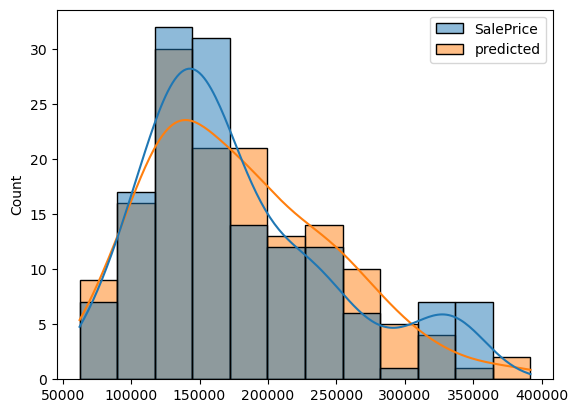

In [149]:
# px.scatter(data_frame= fin,x='SalePrice',y= 'predicted')
sns.histplot(data= fin , kde= True)

# Thank You 
# By Bharath Kumar p